### 데이터 구분
- site : 사이트 번호
- sid : 센서 번호
- idate : 누수 감지 일자
- irate : 누수확률
- leaktype : 누수레벨
- leaktype : 누수 타입 
    - 옥외누수:out
    - 옥내누수:in
    - 기계.전기음:noise
    - 환경음:other
    - 정상음:normal

In [2]:
# 데이터 불러오기
import pandas as pd
df = pd.read_csv('../캡스톤/train.csv')
df.head(10)

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,S-4687025030,S-0359369085120315,20200708,90,256,out,0,18,19,16,...,4690,243,4710,284,4700,324,4670,230,4710,260
1,S-4677025028,S-0359369083968368,20190601,90,542,out,0,4,2,4,...,310,423,300,711,270,412,270,531,290,538
2,S-4673025027,S-0359369085133797,20201028,90,705,out,0,0,0,3,...,240,751,240,897,240,741,240,741,240,562
3,S-4772025022,S-0359369084117593,20200505,90,499,out,0,2,2,2,...,370,549,360,427,370,800,370,552,370,458
4,S-4729010102,S-0359369084010178,20200520,90,423,out,0,3,3,3,...,400,521,400,395,400,461,400,470,400,515
5,S-4280025040,S-0359369085347892,20210108,90,611,out,0,5,5,7,...,300,644,300,504,300,738,300,739,300,793
6,S-4673025027,S-0359369085160188,20210130,90,433,out,0,17,19,19,...,4840,447,240,365,240,464,4870,380,240,486
7,S-4772025022,S-0359369084116777,20200429,90,479,out,0,3,5,5,...,410,630,420,439,410,533,410,455,430,508
8,S-4677025028,S-0359369084263017,20190521,90,234,out,0,6,5,6,...,380,186,360,289,360,243,380,210,350,269
9,S-4677025028,S-0359369084263017,20190321,90,307,out,0,6,6,6,...,350,272,360,319,360,432,290,414,380,276


In [3]:
# 데이터 크기 확인
df.shape

(62564, 539)

In [4]:
# 데이터 살펴보기 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62564 entries, 0 to 62563
Columns: 539 entries, site to MAX19
dtypes: int64(536), object(3)
memory usage: 257.3+ MB


##### 데이터 타입
    - int64 : 536개
    - object : 3개

In [5]:
# ldate datetime 형식으로 변환
df['ldate'] = pd.to_datetime(df['ldate'],format='%Y%m%d')
df['ldate'].head(10)

0   2020-07-08
1   2019-06-01
2   2020-10-28
3   2020-05-05
4   2020-05-20
5   2021-01-08
6   2021-01-30
7   2020-04-29
8   2019-05-21
9   2019-03-21
Name: ldate, dtype: datetime64[ns]

In [6]:
# object type의 데이터 확인
col_obj = df.select_dtypes(include = ['object']).columns
df[col_obj].head()

,site,sid,leaktype
0,S-4687025030,S-0359369085120315,out
1,S-4677025028,S-0359369083968368,out
2,S-4673025027,S-0359369085133797,out
3,S-4772025022,S-0359369084117593,out
4,S-4729010102,S-0359369084010178,out


In [7]:
# 결측값 확인
null_df = df.isnull().sum()
null_df = null_df[ null_df > 0]
print(null_df)

Series([], dtype: int64)


- 결측값 없음 ^^

In [8]:
# 중복된 행 확인
dup = df.duplicated()
dup.sum()

0

- 중복된 행도 없음 :)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# 누수확률 & 누수레벨 확인
df['lrate'].describe()

count    62564.000000
mean        75.931526
std         22.210028
min         30.000000
25%         60.000000
50%         90.000000
75%         90.000000
max         90.000000
Name: lrate, dtype: float64

In [11]:
df['llevel'].describe()

count    62564.000000
mean       447.207228
std        240.240117
min        112.000000
25%        239.000000
50%        400.000000
75%        615.000000
max       1650.000000
Name: llevel, dtype: float64

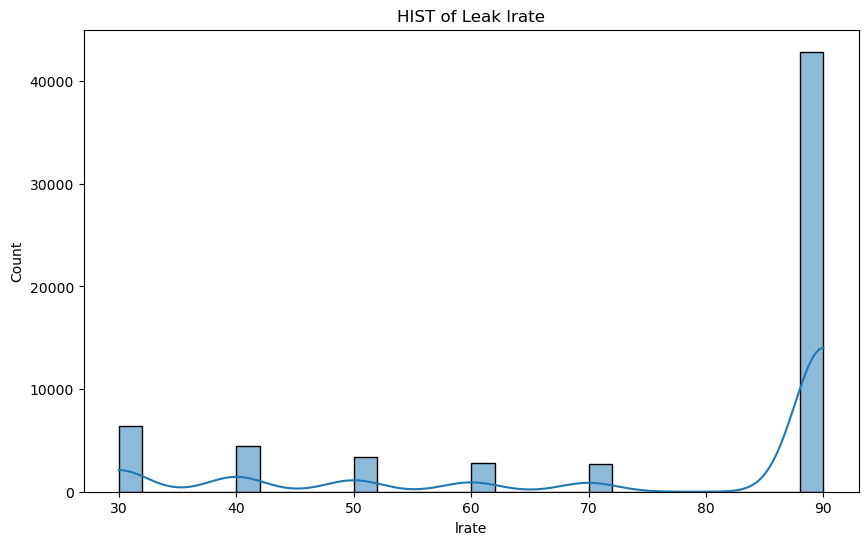

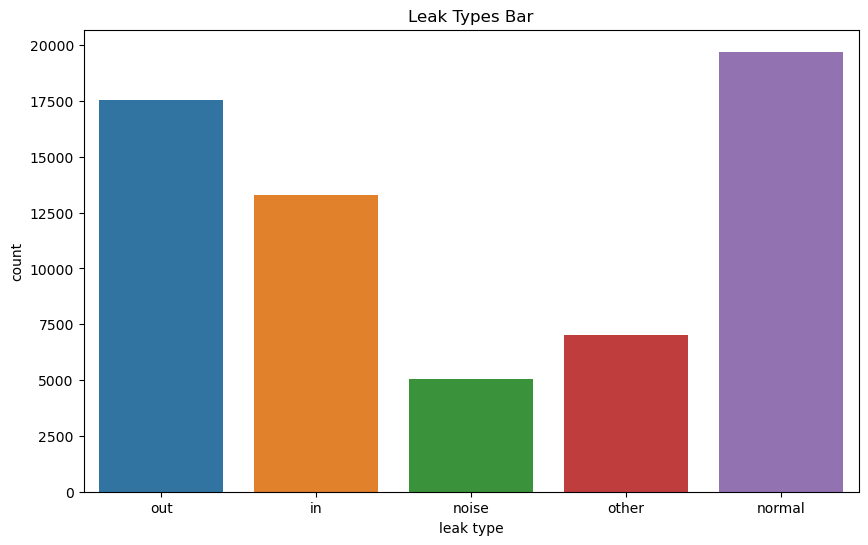

In [12]:
# 누수 확률 누수 레벨 분포 확인 
import matplotlib.pyplot as plt
import seaborn as sns


#누수 확률(lrate) 히스토그램
plt.figure(figsize=(10,6))
sns.histplot(df['lrate'],bins=30,kde=True)
plt.title("HIST of Leak lrate")
plt.xlabel("lrate")
plt.show()

#누수 레벨(leaktype) 막대그래프
plt.figure(figsize=(10,6))
sns.countplot(x=df['leaktype'])
plt.title("Leak Types Bar")
plt.xlabel("leak type")
plt.ylabel("count")
plt.show()

- 누수확률 90인 자료가 많음
- 정상음이 가장 많음

### <span style="color:red"> 박스플롯 이상함</span>

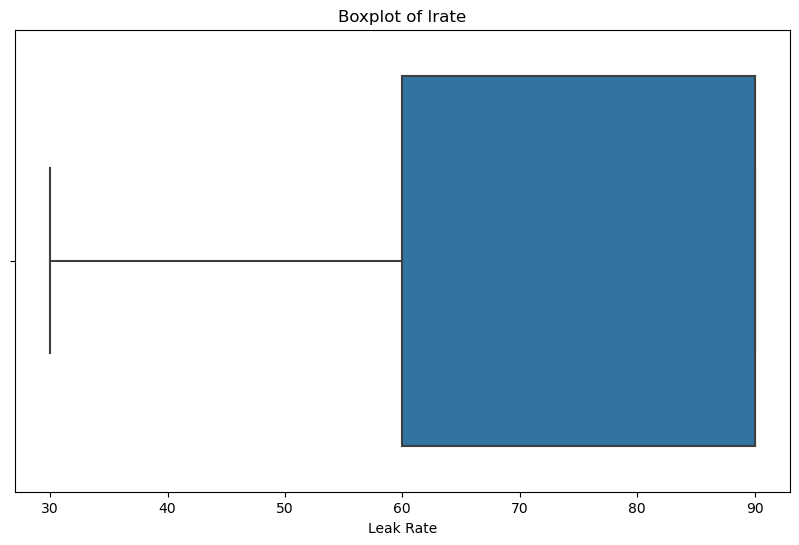

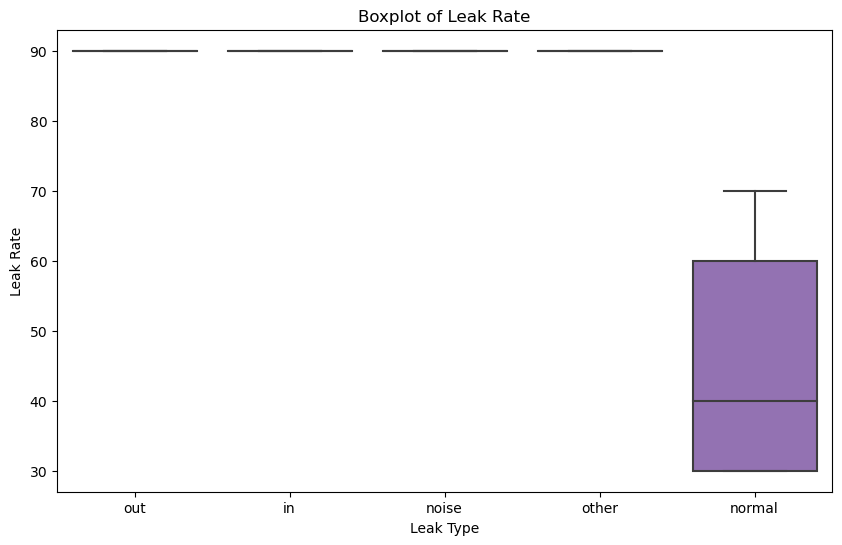

In [13]:
#박스플롯 그리기

#lrate 
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['lrate'])  
plt.title("Boxplot of lrate")
plt.xlabel("Leak Rate")
plt.show()

#leaktype 
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['leaktype'], y=df['lrate']) 
plt.title("Boxplot of Leak Rate")
plt.xlabel("Leak Type")
plt.ylabel("Leak Rate")
plt.show()

### 주파수 평균 관련 시각화 

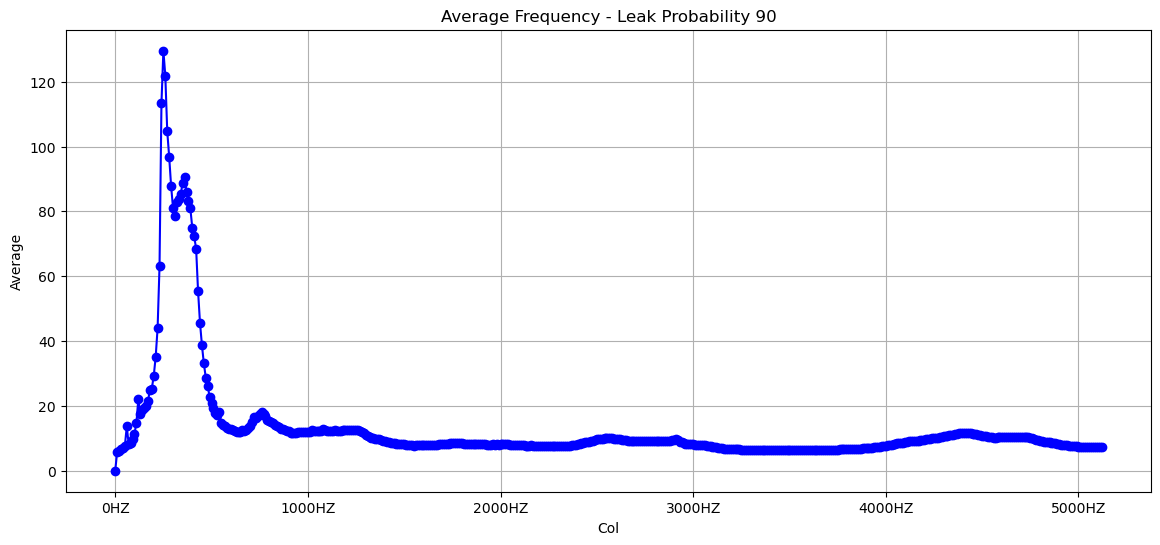

In [14]:
# lrate가 90인 경우 각 주파수 구간의 평균 변화 
filtered_data = df[df['lrate'] == 90]

# 0HZ - 5120HZ까지 
frequency_data = filtered_data.iloc[:, 6:519]  

# 각 주파수 관련 칼럼의 평균 계산
frequency_means = frequency_data.mean()

# 평균 변화를 라인 그래프로 시각화
plt.figure(figsize=(14, 6))
frequency_means.plot(kind='line', marker='o', color='b')
plt.title("Average Frequency - Leak Probability 90")
plt.xlabel("Col")
plt.ylabel("Average")
plt.grid()
plt.show()

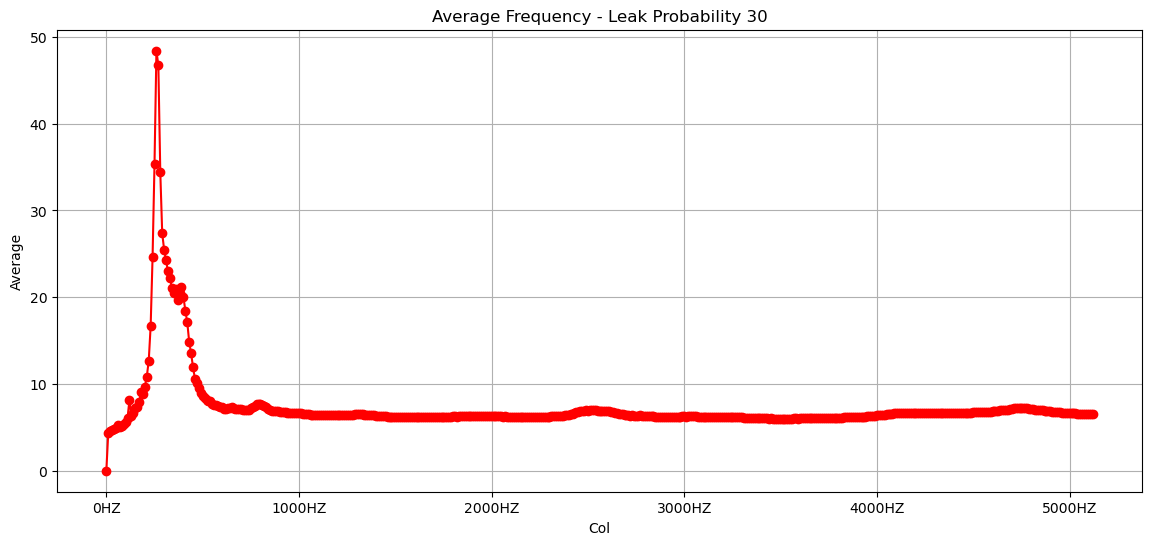

In [15]:
# lrate가 30인 경우 각 주파수 구간의 평균 변화 
filtered_data = df[df['lrate'] == 30]

# 0HZ - 5120HZ까지 
frequency_data = filtered_data.iloc[:, 6:519]  

# 각 주파수 관련 칼럼의 평균 계산
frequency_means = frequency_data.mean()

# 평균 변화를 라인 그래프로 시각화
plt.figure(figsize=(14, 6))
frequency_means.plot(kind='line', marker='o', color='r')
plt.title("Average Frequency - Leak Probability 30")
plt.xlabel("Col")
plt.ylabel("Average")
plt.grid()
plt.show()

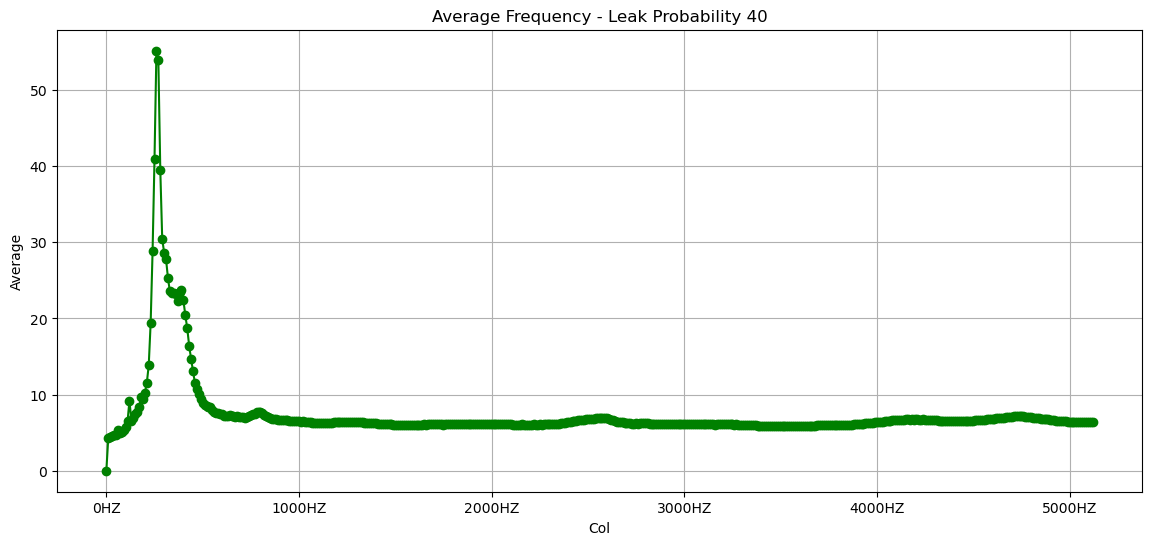

In [16]:
# lrate가 40인 경우 각 주파수 구간의 평균 변화 
filtered_data = df[df['lrate'] == 40]

# 0HZ - 5120HZ까지 
frequency_data = filtered_data.iloc[:, 6:519]  

# 각 주파수 관련 칼럼의 평균 계산
frequency_means = frequency_data.mean()

# 평균 변화를 라인 그래프로 시각화
plt.figure(figsize=(14, 6))
frequency_means.plot(kind='line', marker='o', color='g')
plt.title("Average Frequency - Leak Probability 40")
plt.xlabel("Col")
plt.ylabel("Average")
plt.grid()
plt.show()

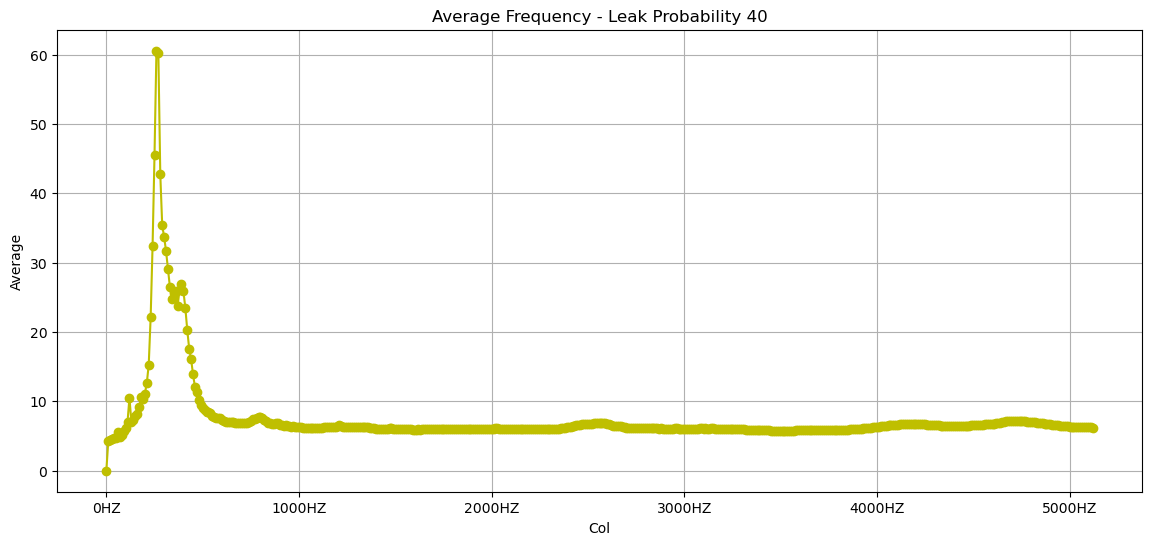

In [17]:
# lrate가 50인 경우 각 주파수 구간의 평균 변화 
filtered_data = df[df['lrate'] == 50]

# 0HZ - 5120HZ까지 
frequency_data = filtered_data.iloc[:, 6:519]  

# 각 주파수 관련 칼럼의 평균 계산
frequency_means = frequency_data.mean()

# 평균 변화를 라인 그래프로 시각화
plt.figure(figsize=(14, 6))
frequency_means.plot(kind='line', marker='o', color='y')
plt.title("Average Frequency - Leak Probability 40")
plt.xlabel("Col")
plt.ylabel("Average")
plt.grid()
plt.show()

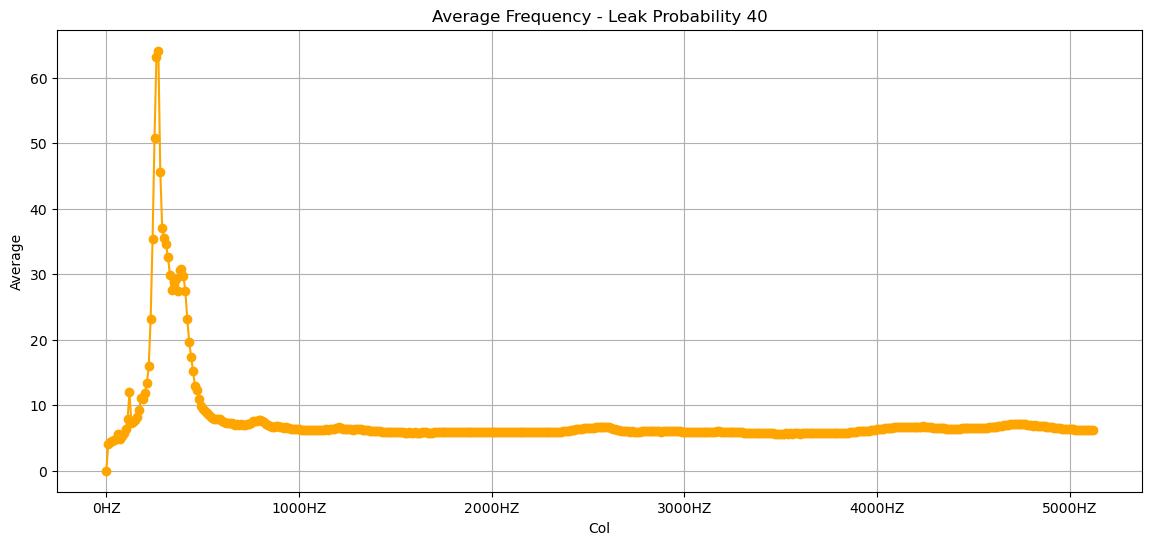

In [18]:
# lrate가 60인 경우 각 주파수 구간의 평균 변화 
filtered_data = df[df['lrate'] == 60]

# 0HZ - 5120HZ까지 
frequency_data = filtered_data.iloc[:, 6:519]  

# 각 주파수 관련 칼럼의 평균 계산
frequency_means = frequency_data.mean()

# 평균 변화를 라인 그래프로 시각화
plt.figure(figsize=(14, 6))
frequency_means.plot(kind='line', marker='o', color='orange')
plt.title("Average Frequency - Leak Probability 40")
plt.xlabel("Col")
plt.ylabel("Average")
plt.grid()
plt.show()

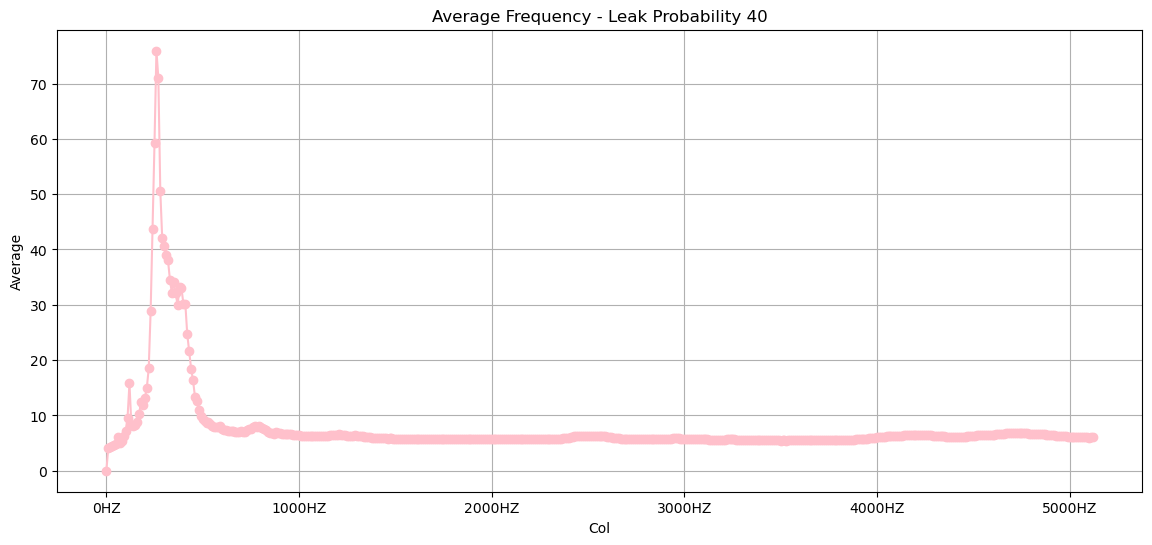

In [19]:
# lrate가 70인 경우 각 주파수 구간의 평균 변화 
filtered_data = df[df['lrate'] == 70]

# 0HZ - 5120HZ까지 
frequency_data = filtered_data.iloc[:, 6:519]  

# 각 주파수 관련 칼럼의 평균 계산
frequency_means = frequency_data.mean()

# 평균 변화를 라인 그래프로 시각화
plt.figure(figsize=(14, 6))
frequency_means.plot(kind='line', marker='o', color='pink')
plt.title("Average Frequency - Leak Probability 40")
plt.xlabel("Col")
plt.ylabel("Average")
plt.grid()
plt.show()

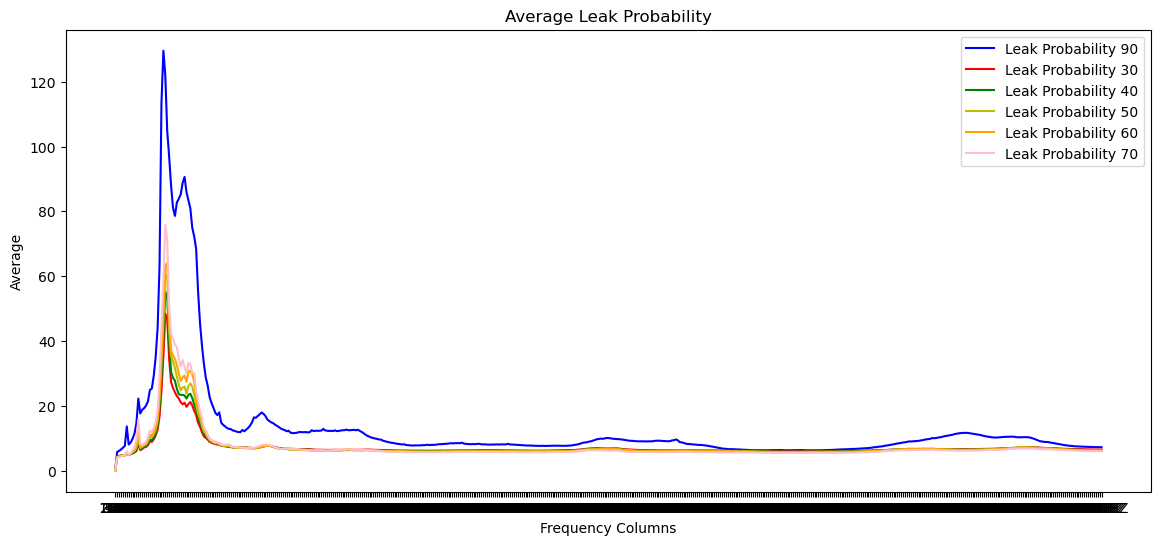

In [20]:
# 각 lrate에 따른 필터링 및 평균 계산
lrate_values = [90, 30, 40,50,60,70]
colors = ['b', 'r', 'g','y','orange','pink']
labels = ['Leak Probability 90', 'Leak Probability 30', 'Leak Probability 40','Leak Probability 50', 'Leak Probability 60','Leak Probability 70']

plt.figure(figsize=(14, 6))

for lrate, color, label in zip(lrate_values, colors, labels):
    # lrate 필터링
    filtered_data = df[df['lrate'] == lrate]
    
    # 0Hz - 5120Hz까지의 주파수 데이터 추출
    frequency_data = filtered_data.iloc[:, 6:519]
    
    # 각 주파수 관련 칼럼의 평균 계산
    frequency_means = frequency_data.mean()
    
    # 평균 변화를 라인 그래프로 겹쳐서 시각화
    plt.plot(frequency_means, color=color, label=label)

# 그래프 제목 및 레이블 설정
plt.title("Average Leak Probability")
plt.xlabel("Frequency Columns")
plt.ylabel("Average")
plt.legend()  # 각 누수 확률에 대한 레전드 추가
plt.show()

- 저주파수 대역에서 진동이 강함 
- 고주파수 대역으로 갈 수록 일정한 값을 유지하는 경향
- 고주파수 대역에서 누수 관련 진동이 안정적이거나 누수와 관계 없는 배경 소음이 존재하는 것 같음

90 제외 그래프는 비슷하게 생김 

### leaktype별 주파수 시각화

In [22]:
# leaktype 숫자로 변경
leaktype_mapping = {
    "out": 1,
    "in": 2,
    "noise": 3,
    "other": 4,
    "normal": 5
}

# 데이터에 적용
df['leaktype'] = df['leaktype'].map(leaktype_mapping)

# 확인
print(df['leaktype'].unique())

[1 2 3 4 5]


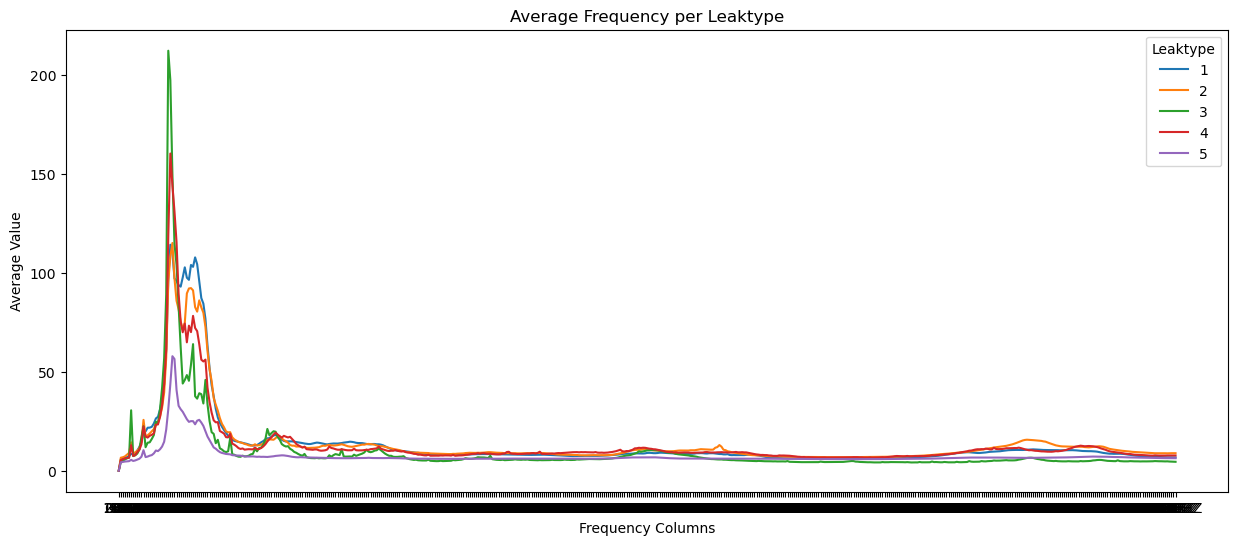

In [23]:
plt.figure(figsize=(15, 6))

# 각 leaktype에 대한 라인 차트를 하나의 플롯에 겹쳐서 그리기
for leaktype_value in df['leaktype'].unique():
    # 각 leaktype 값에 해당하는 데이터 필터링
    filtered_data = df[df['leaktype'] == leaktype_value]
    
    # 주파수 관련 컬럼 선택 (열 6부터 519까지)
    frequency_data = filtered_data.iloc[:, 6:519]
    
    # 주파수 관련 컬럼들의 평균 계산
    frequency_means = frequency_data.mean()
    
    # 각 leaktype별 평균 변화 라인 차트 추가
    plt.plot(frequency_means, label=f"{leaktype_value}",)

# 그래프에 제목, 축 라벨 및 범례 추가
plt.title("Average Frequency per Leaktype")
plt.xlabel("Frequency Columns")
plt.ylabel("Average Value")
plt.legend(title="Leaktype")
plt.show()


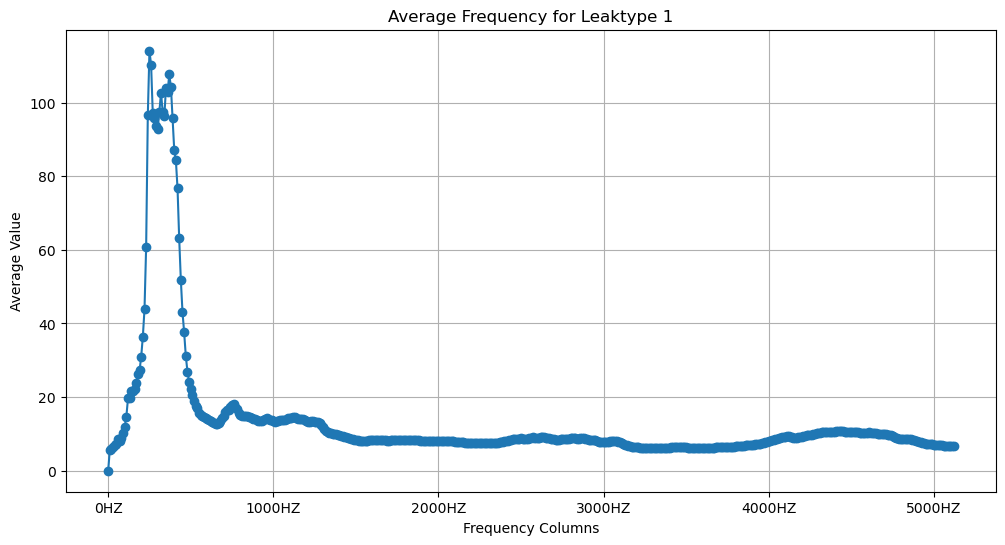

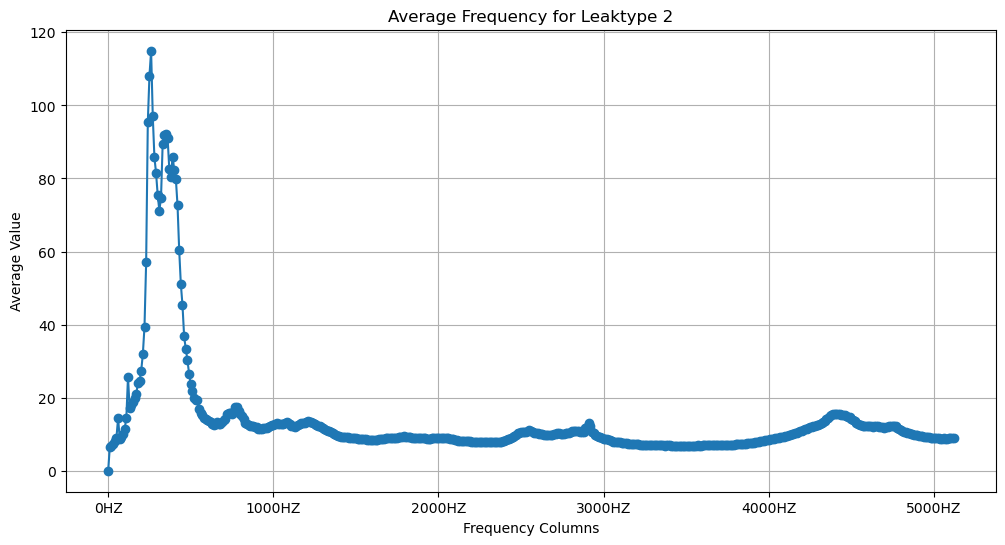

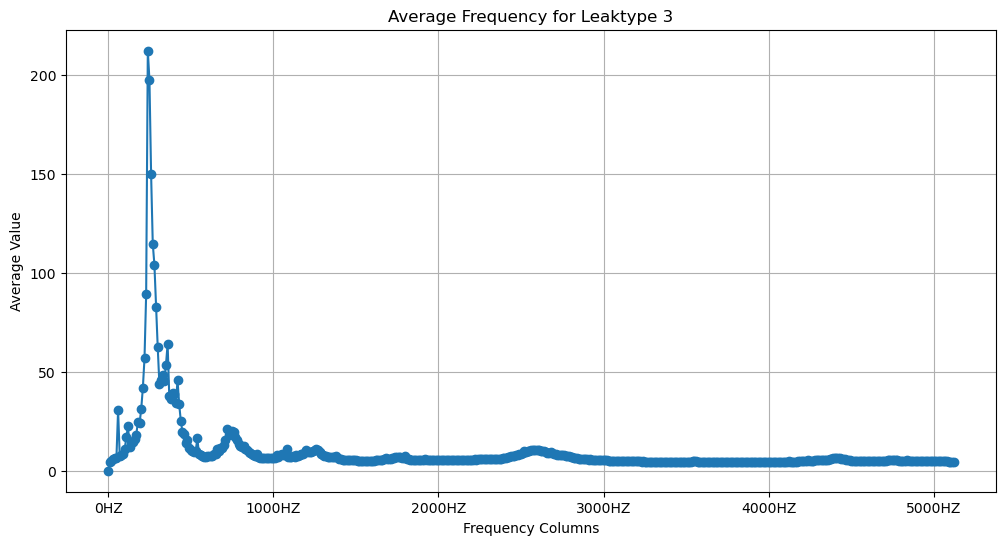

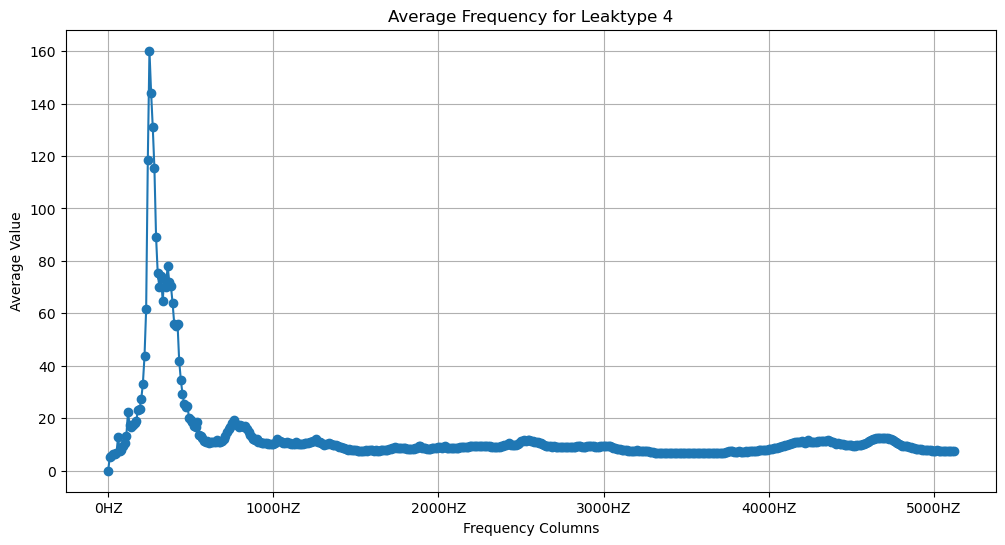

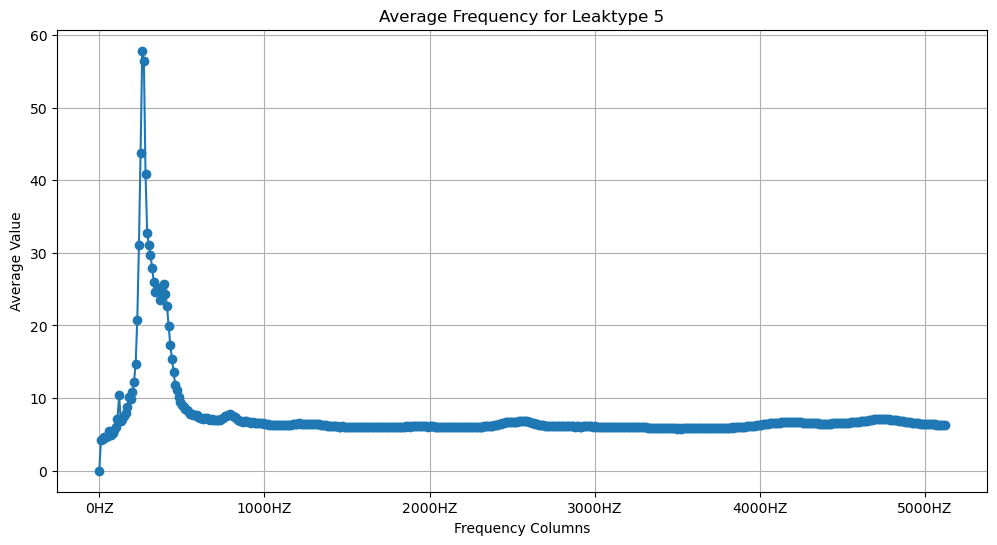

In [24]:
for leaktype_value in df['leaktype'].unique():
    # 각 leaktype 값에 해당하는 데이터 필터링
    filtered_data = df[df['leaktype'] == leaktype_value]
    
    # 주파수 관련 컬럼 선택 (열 6부터 519까지)
    frequency_data = filtered_data.iloc[:, 6:519]
    
    # 주파수 관련 컬럼들의 평균 계산
    frequency_means = frequency_data.mean()
    
    # 라인 차트 시각화
    plt.figure(figsize=(12, 6))
    frequency_means.plot(kind='line', marker='o')
    plt.title(f"Average Frequency for Leaktype {leaktype_value}")
    plt.xlabel("Frequency Columns")
    plt.ylabel("Average Value")
    plt.grid()
    plt.show()

- leaktype3의 피크가 가장 높게 나타남
- type3의 진동이 저주파 대역에서 가장 강한 진동을 발생시킴
- 모두 비슷한 경향을 가지지만 강도의 차이가 있는 듯

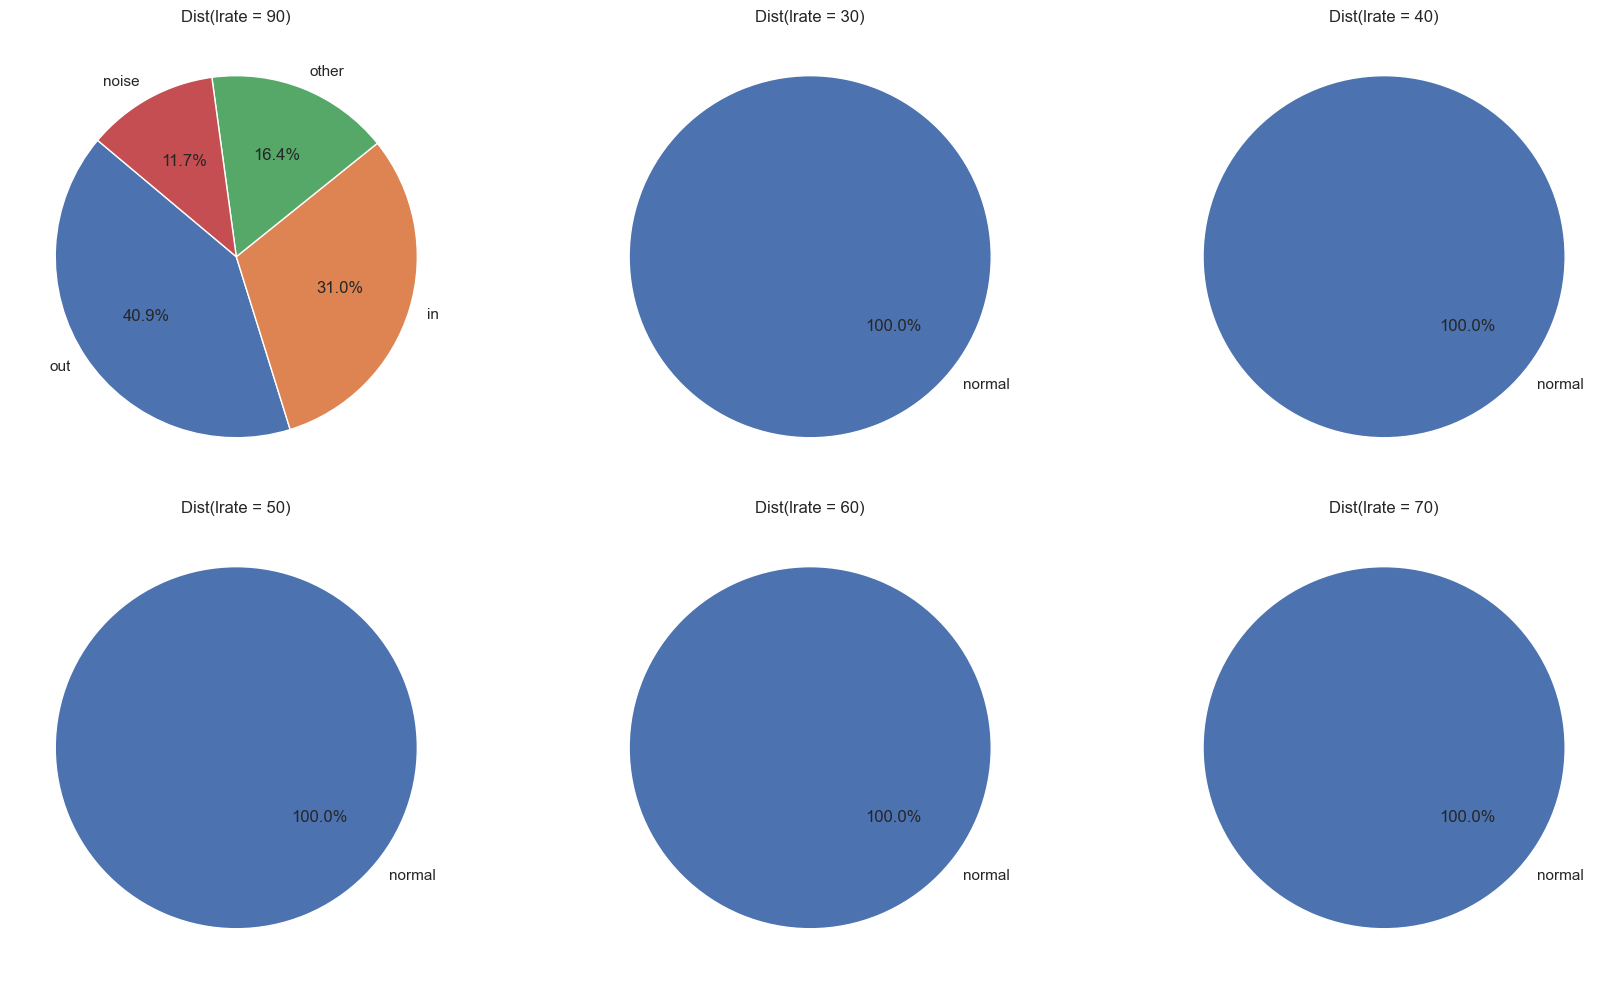

In [83]:
# lrate 
lrate_values = [90, 30, 40, 50, 60, 70]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  
for i, lrate in enumerate(lrate_values):
    filtered_data = df[df['lrate'] == lrate]
    
    leaktype_counts = filtered_data['leaktype'].value_counts()
    
    axes[i].pie(leaktype_counts, labels=leaktype_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f"Dist(lrate = {lrate})")

plt.tight_layout()
plt.show()

### 각 lrate별 leaktype 시각화 

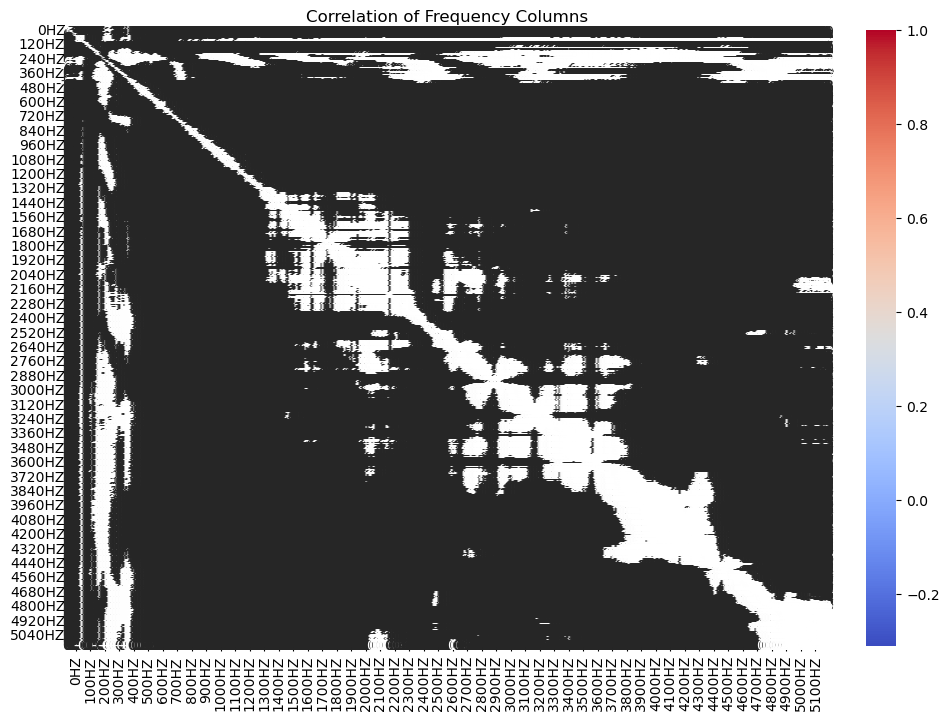

In [26]:
# 주파수별 상관관계 분석 시각화 
frequency_data = filtered_data.iloc[:, 6:519]
# 주파수 간의 상관관계 분석
correlation_matrix = frequency_data.corr()
# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation of Frequency Columns')
plt.show()

- 특정 주파수 대역끼리 유사한 특성을 보이는 것 같음 - 흰색 부분이 그룹화 된 경향..

### 사용 배관
- 금속관(SP,STS,DCIP)
- 비금속관(PE,PVC)

=> 사용 배관에 따라 일반적인 누수의 범위가 다름 

### 저주파영역 500HZ까지 누수타입별 평균 변화 시각화

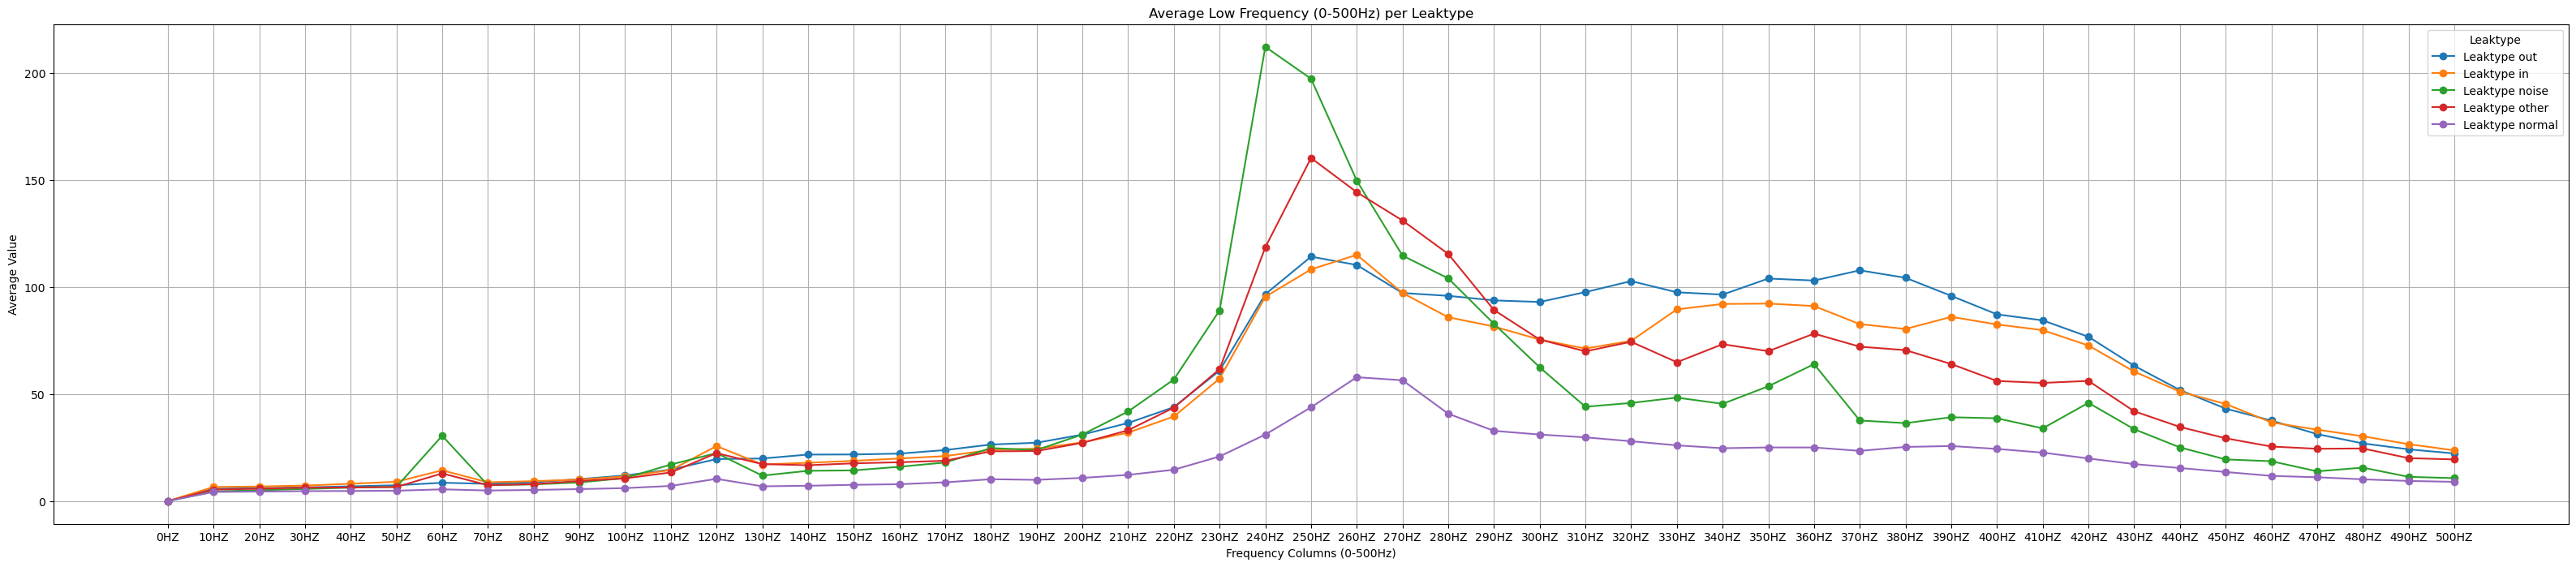

In [14]:
low_col = df.columns[6:57]  # 0~500Hz

# 각 leaktype별로 저주파 대역의 평균 변화를 시각화
plt.figure(figsize=(40, 8))

for leaktype_value in df['leaktype'].unique():
    filtered_data = df[df['leaktype'] == leaktype_value]
    low_mean = filtered_data[low_col].mean()
    
    # 평균 변화를 라인 그래프로 시각화
    plt.plot(low_mean, label=f"Leaktype {leaktype_value}", marker='o')

# 그래프 설정
plt.title("Average Low Frequency (0-500Hz) per Leaktype")
plt.xlabel("Frequency Columns (0-500Hz)")
plt.ylabel("Average Value")
plt.legend(title="Leaktype")
plt.grid()
plt.show()


- 누수현상이 발생했을 때 대부분 저주파 영역에서 발생하는 듯 함

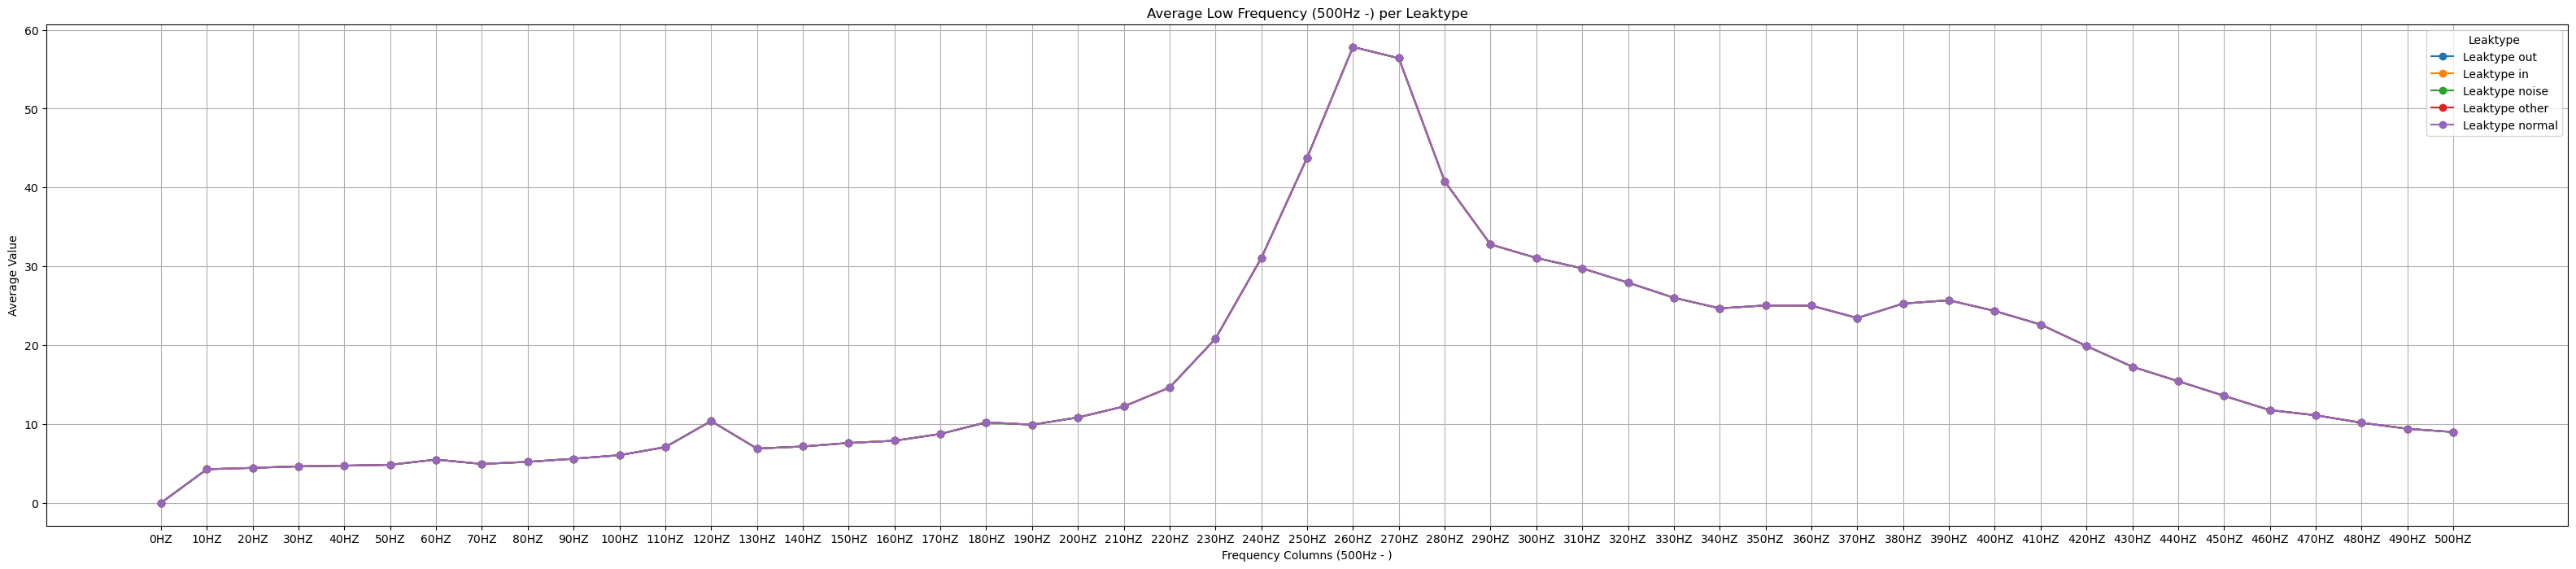

In [24]:
high_col = df.columns[56:519]  # 500Hz 이상 

# 각 leaktype별로 저주파 대역의 평균 변화를 시각화
plt.figure(figsize=(40, 8))

for leaktype_value in df['leaktype'].unique():
    filtered_data = df[df['leaktype'] == leaktype_value]
    high_mean = filtered_data[high_col].mean()
    
    # 평균 변화를 라인 그래프로 시각화
    plt.plot(low_mean, label=f"Leaktype {leaktype_value}", marker='o')

# 그래프 설정
plt.title("Average Low Frequency (500Hz -) per Leaktype")
plt.xlabel("Frequency Columns (500Hz - )")
plt.ylabel("Average Value")
plt.legend(title="Leaktype")
plt.grid()
plt.show()

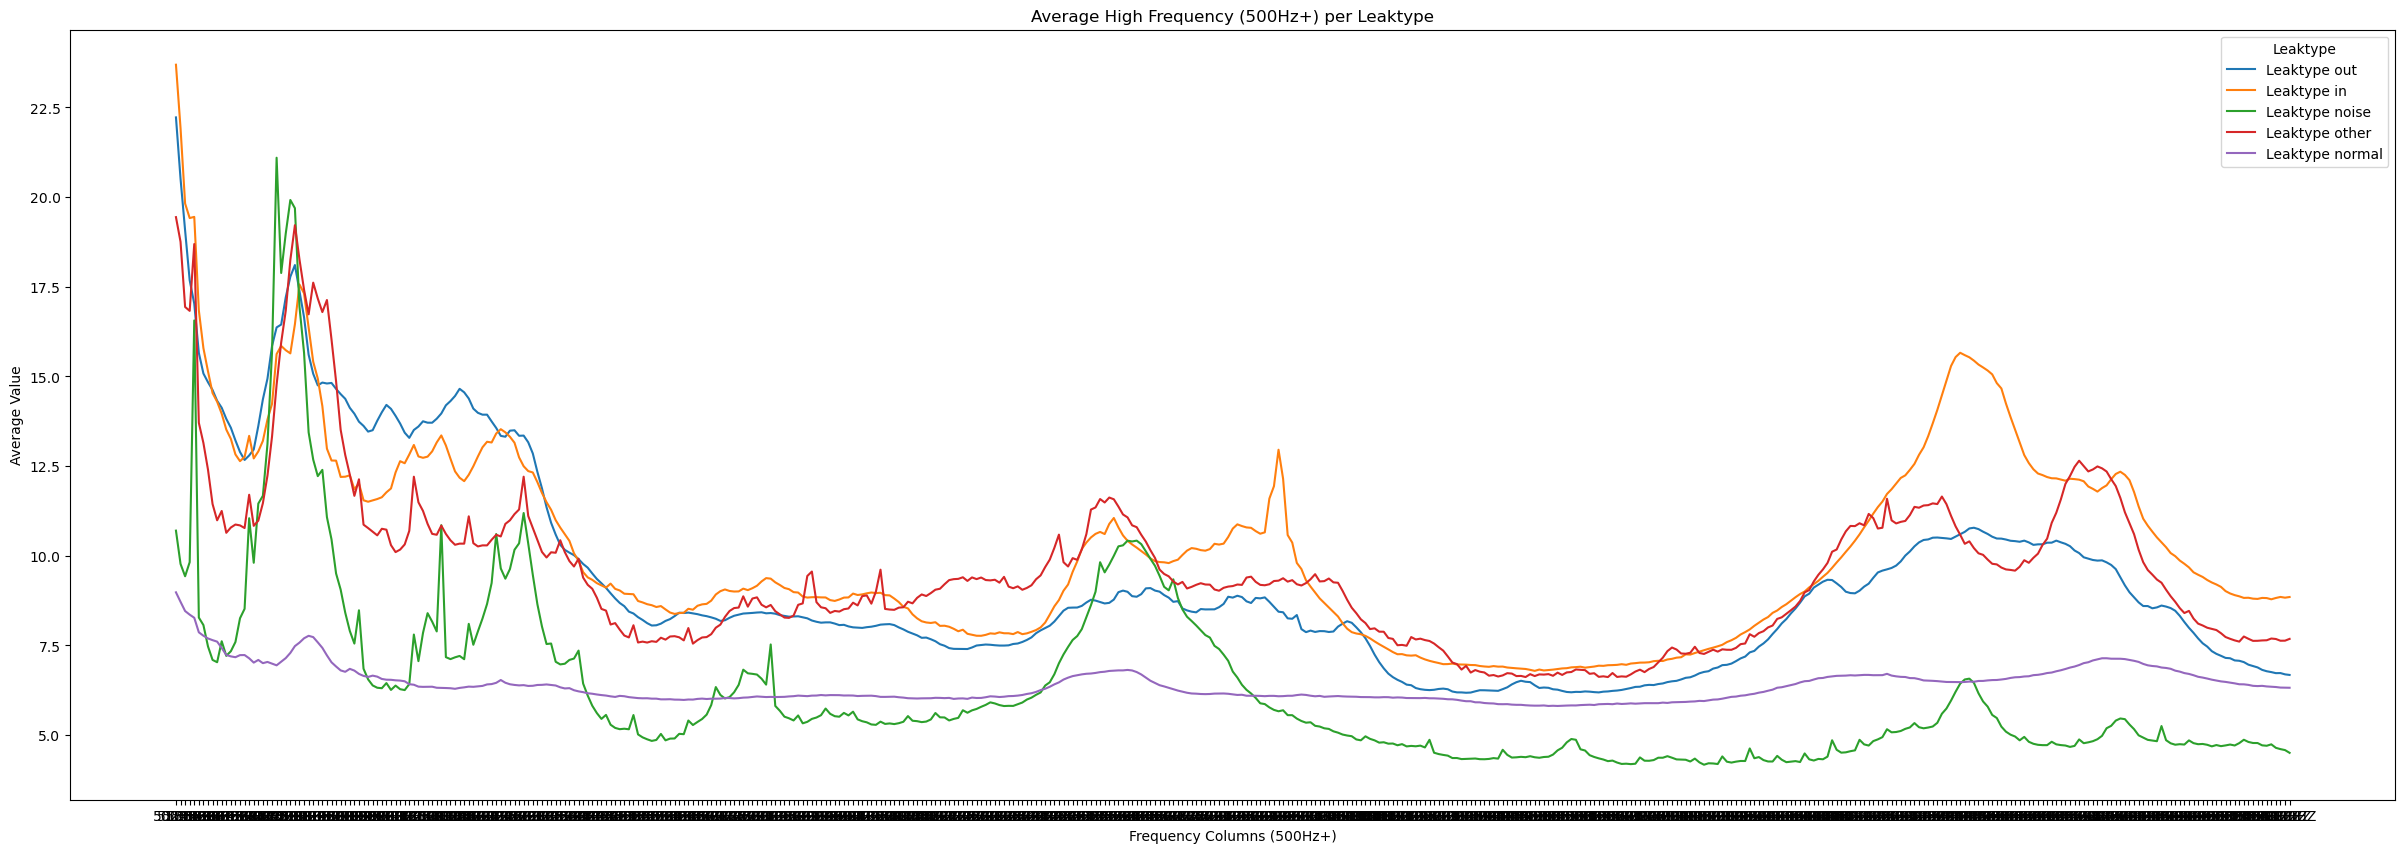

In [32]:
high_col = df.columns[56:519] 
# 그래프 크기 설정
plt.figure(figsize=(30, 10))

# 각 leaktype에 대해 500Hz 이상 주파수 구간의 평균 변화를
for leaktype_value in df['leaktype'].unique():
    filtered_data = df[df['leaktype'] == leaktype_value]
    high_mean = filtered_data[high_col].mean()
    plt.plot(high_mean, label=f"Leaktype {leaktype_value}")

# 그래프 설정
plt.title("Average High Frequency (500Hz+) per Leaktype")
plt.xlabel("Frequency Columns (500Hz+)")
plt.ylabel("Average Value")
plt.legend(title="Leaktype")
plt.show()

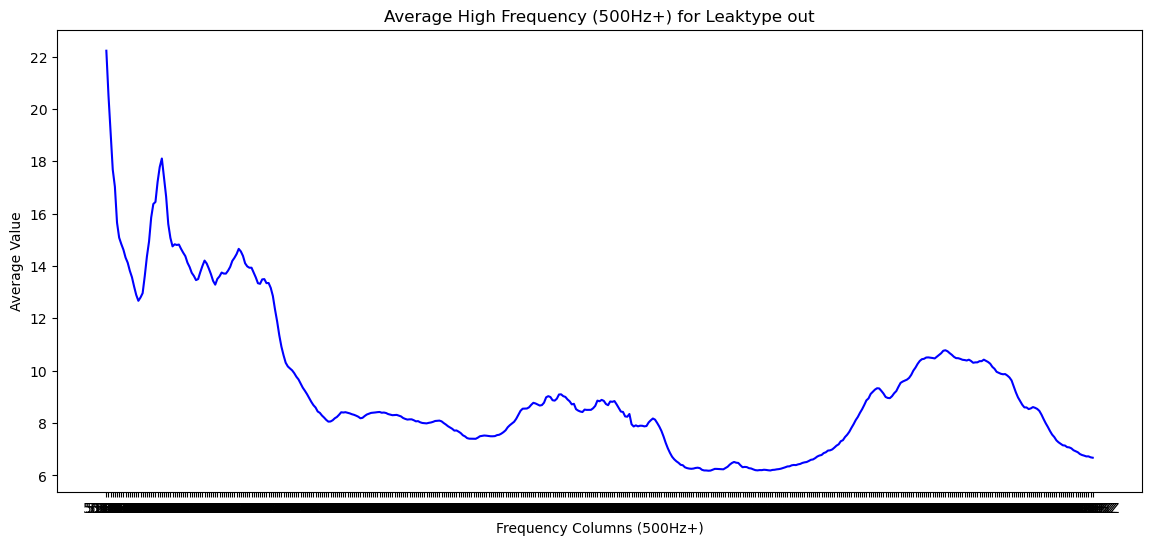

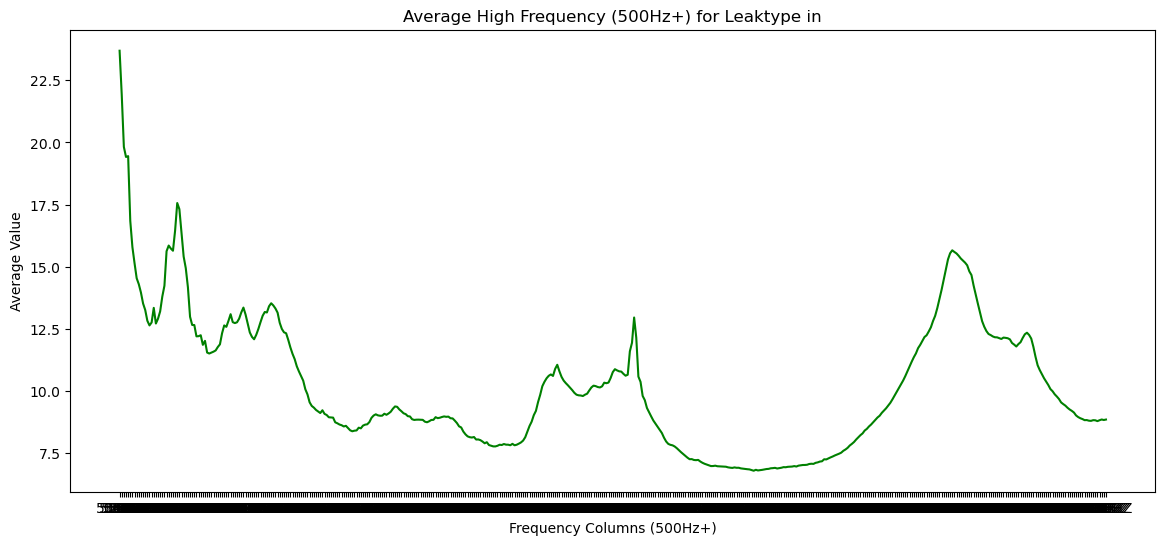

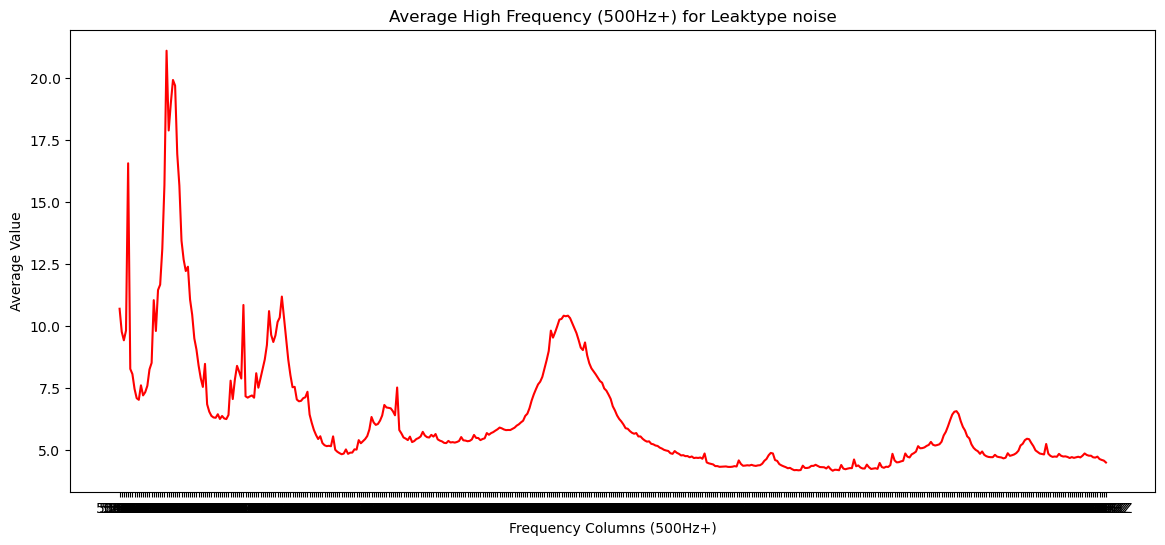

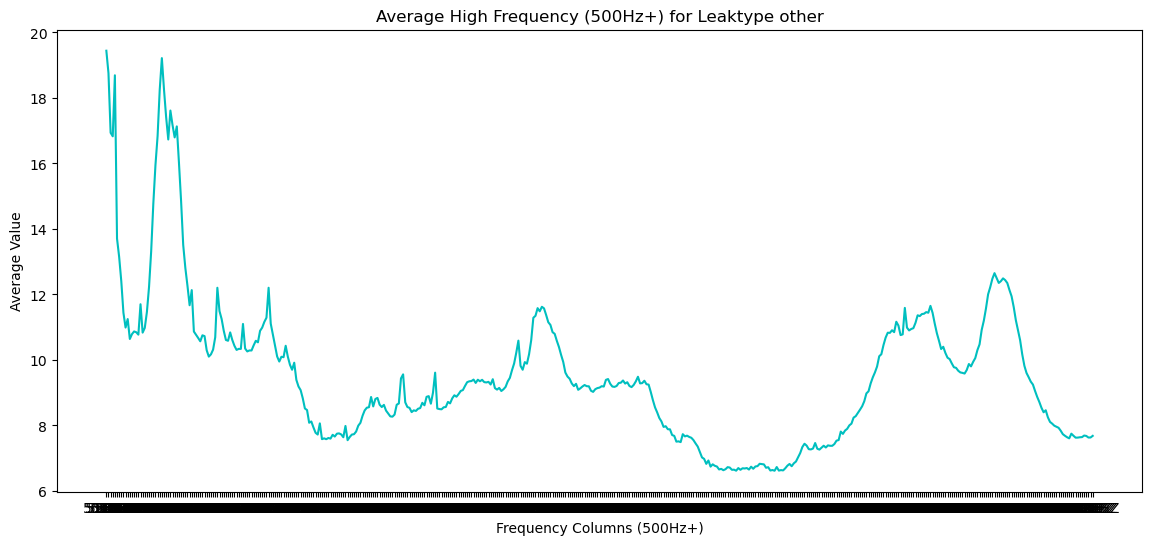

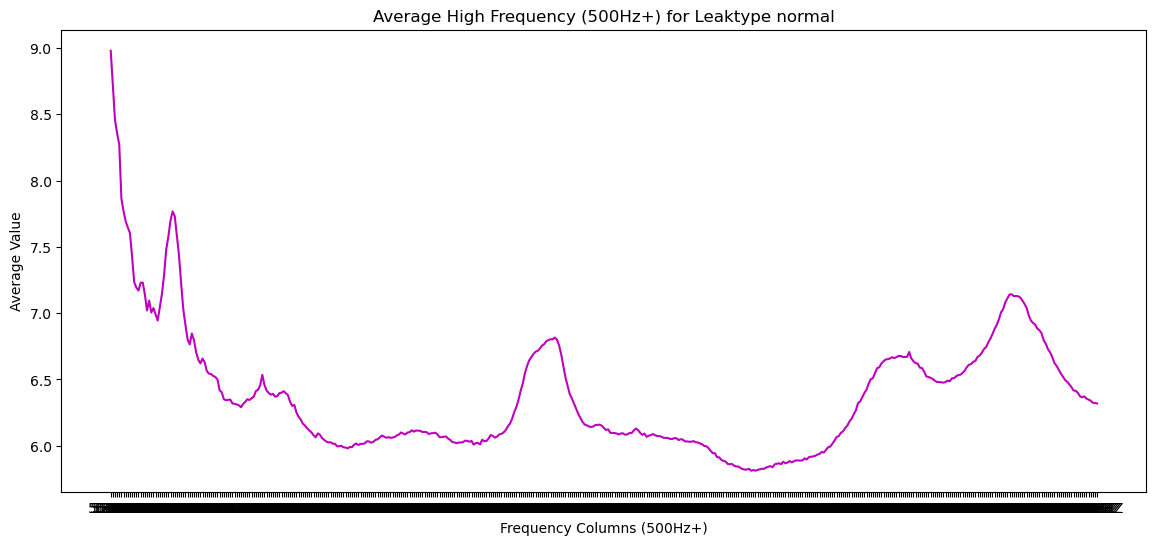

In [35]:
import itertools
# 고주파수 대역 (500Hz 이상)의 열
high_col = df.columns[56:519]

colors = itertools.cycle(['b', 'g', 'r', 'c', 'm'])

# 각 leaktype별로 개별 그래프 시각화
for leaktype_value in df['leaktype'].unique():
    filtered_data = df[df['leaktype'] == leaktype_value]
    high_mean = filtered_data[high_col].mean()

    plt.figure(figsize=(14, 6))
    color = next(colors) 
    plt.plot(high_mean, color=color)
    plt.title(f"Average High Frequency (500Hz+) for Leaktype {leaktype_value}")
    plt.xlabel("Frequency Columns (500Hz+)")
    plt.ylabel("Average Value")
    plt.show()


### MAX 변수 분포

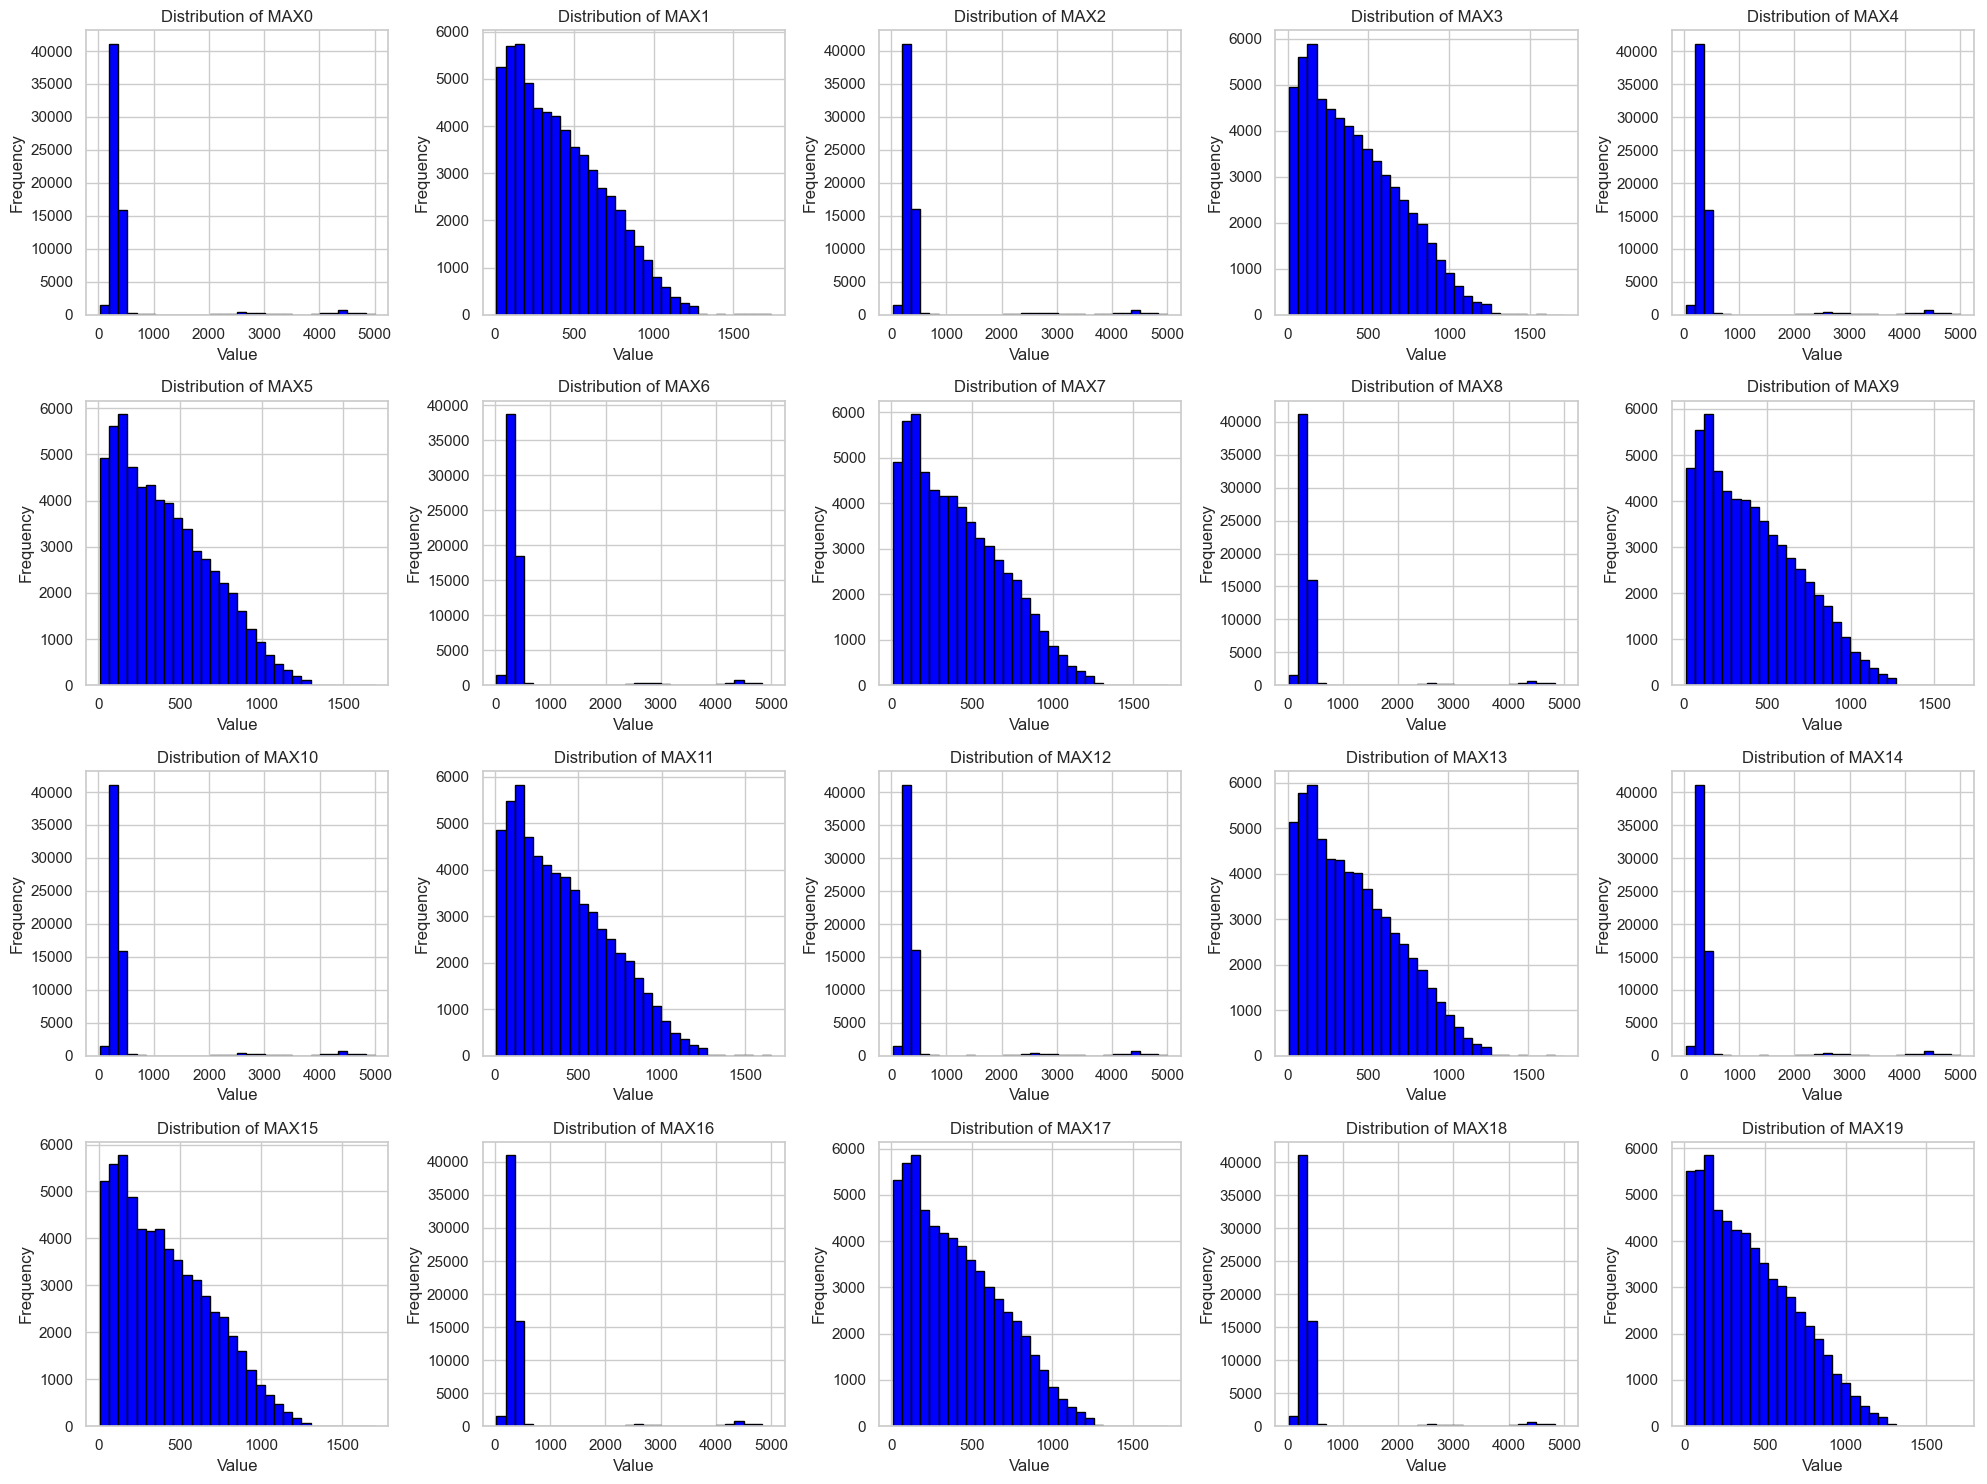

In [53]:
max_col = df.columns[df.columns.str.startswith('MAX')]
plt.figure(figsize=(20, 15))
for i, col in enumerate(max_col, 1):
    plt.subplot(4, 5, i)
    plt.hist(df[col], bins=30, color='blue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

- 비대칭적인 분포 ( 오른쪽 긴 꼬리 ) - 대부분 낮은 값을 가진다 

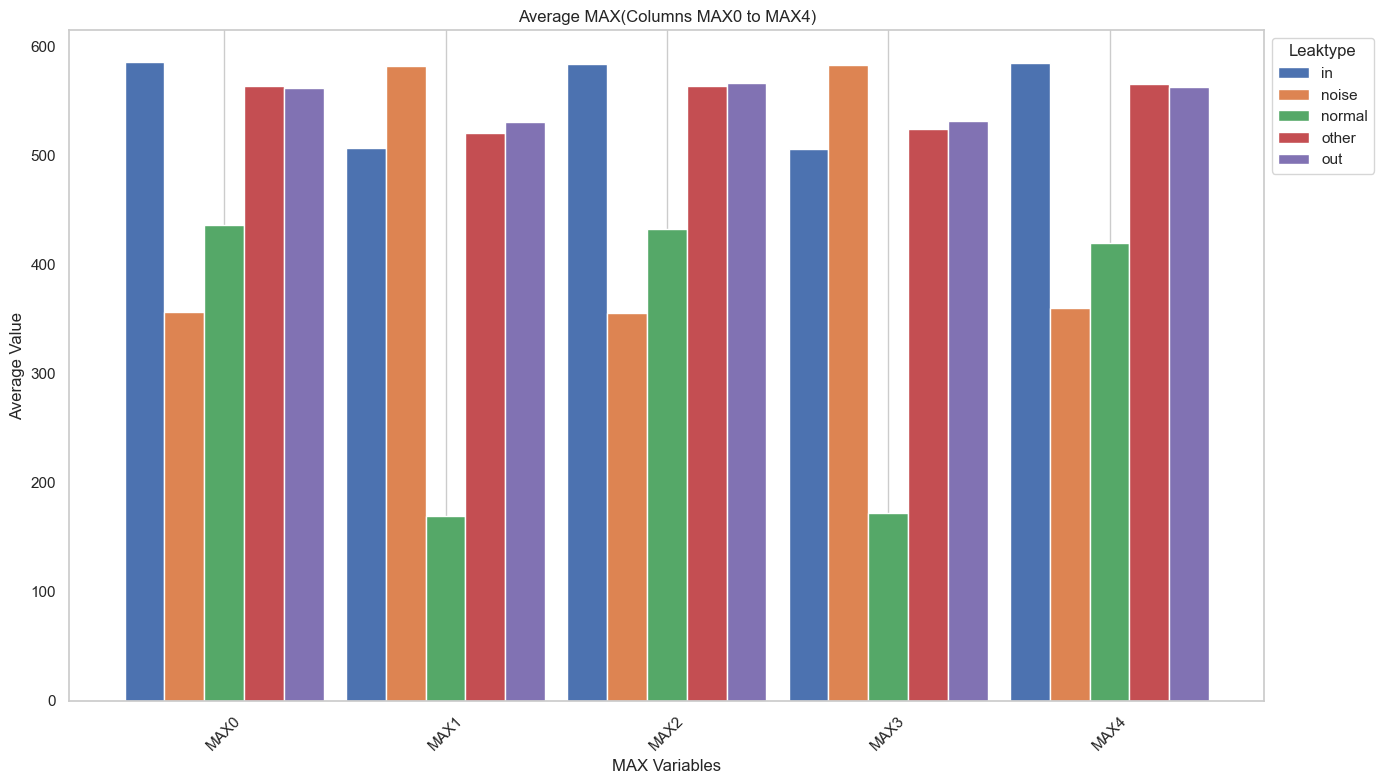

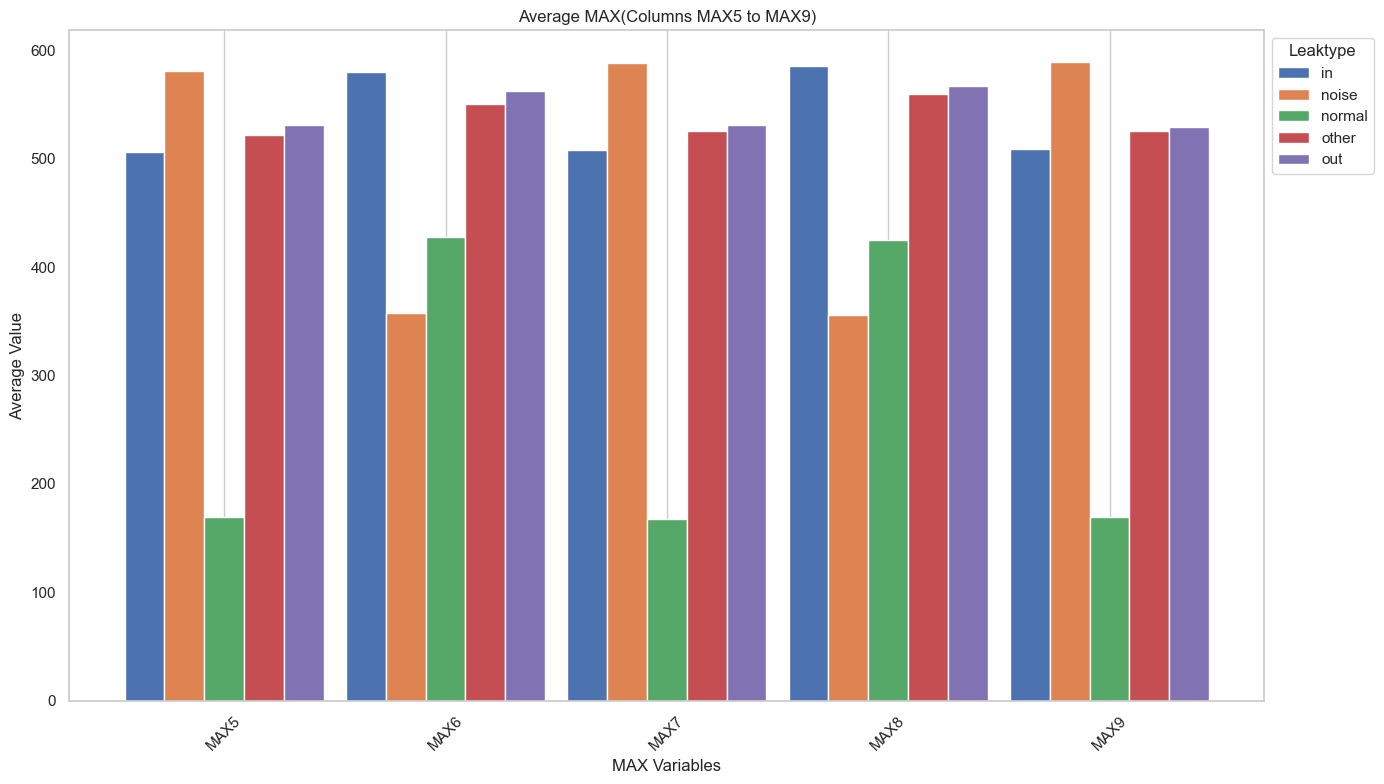

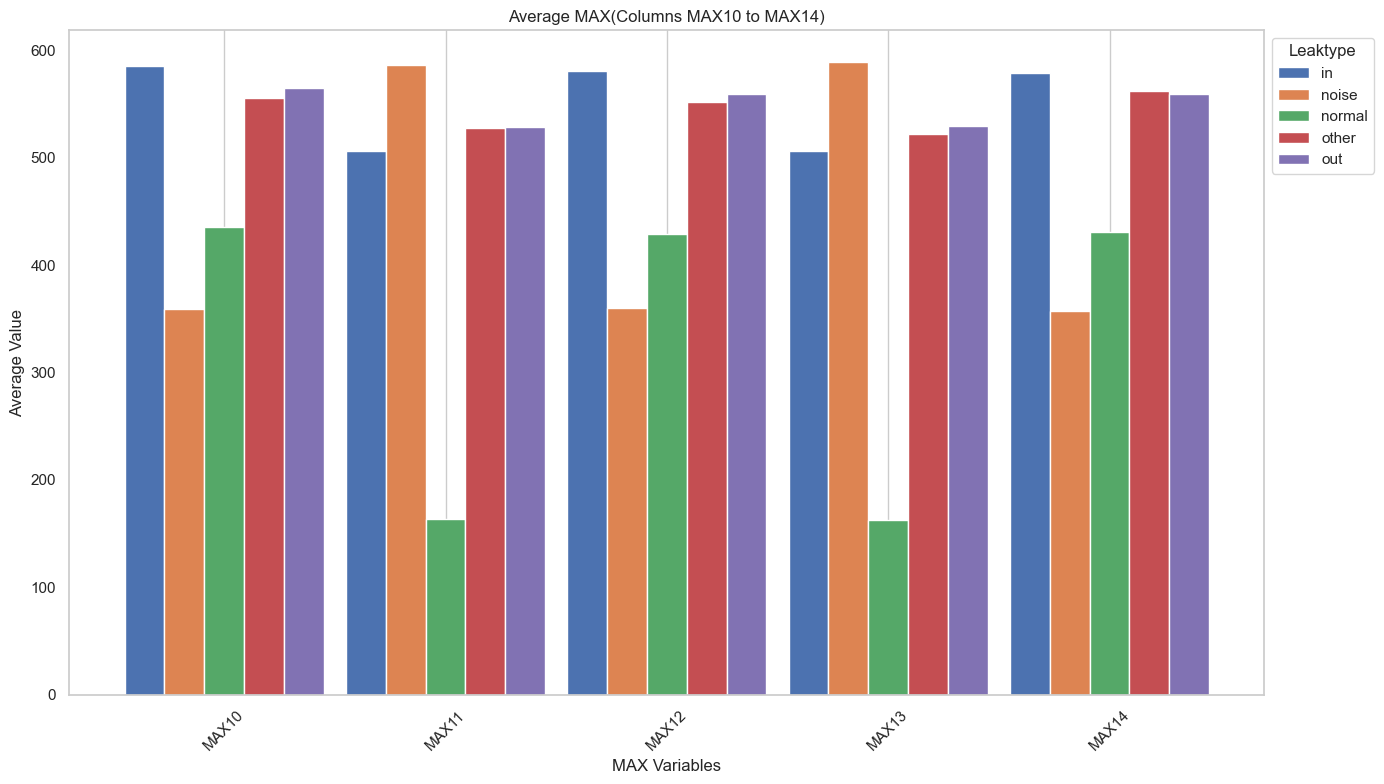

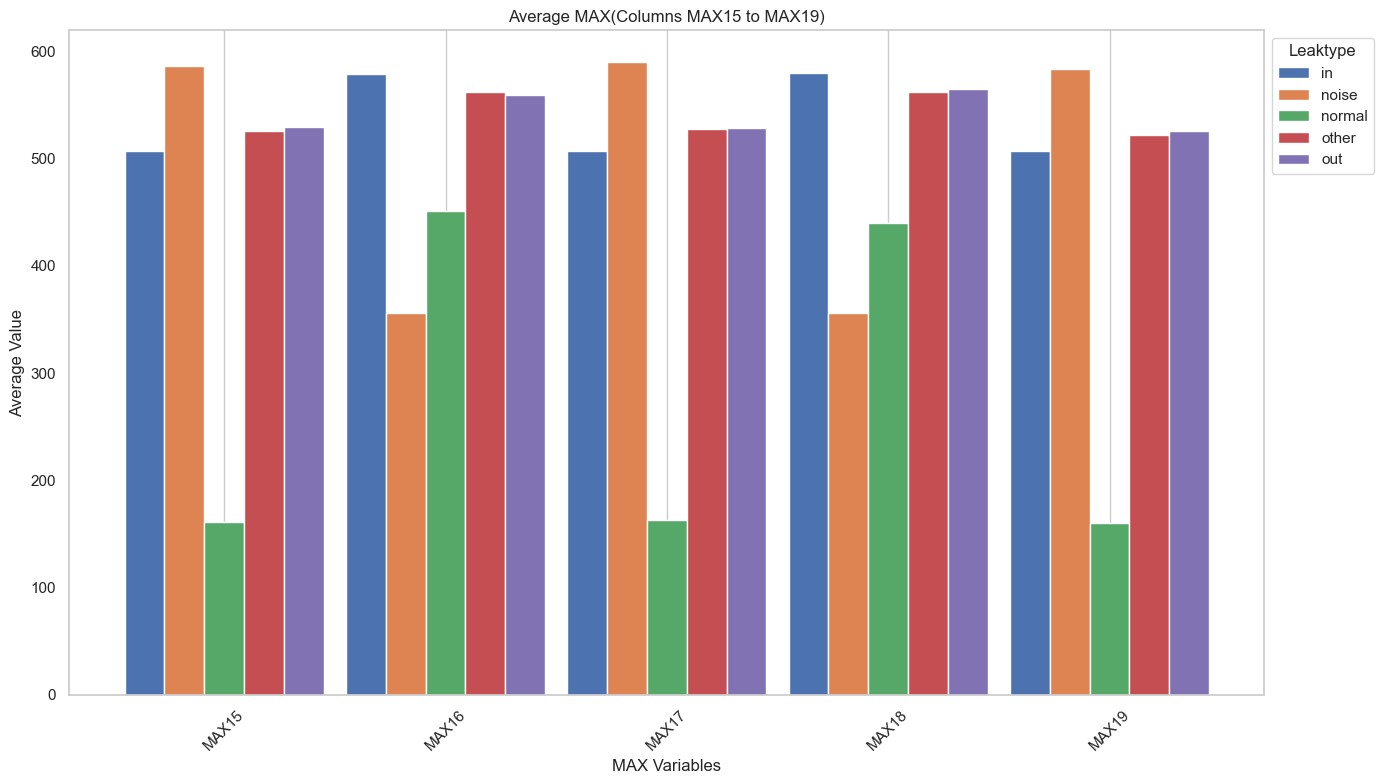

In [55]:
num_cols = len(max_col)
group_size = 5

for start in range(0, num_cols, group_size):
    current_cols = max_col[start:start + group_size]
    leaktype_means = df.groupby('leaktype')[current_cols].mean()
    leaktype_means.T.plot(kind='bar', figsize=(14, 8), width=0.9)
    plt.title(f"Average MAX(Columns {current_cols[0]} to {current_cols[-1]})")
    plt.xlabel("MAX Variables")
    plt.ylabel("Average Value")
    plt.legend(title="Leaktype", bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()


### lrate와 max 상관관계 시각화

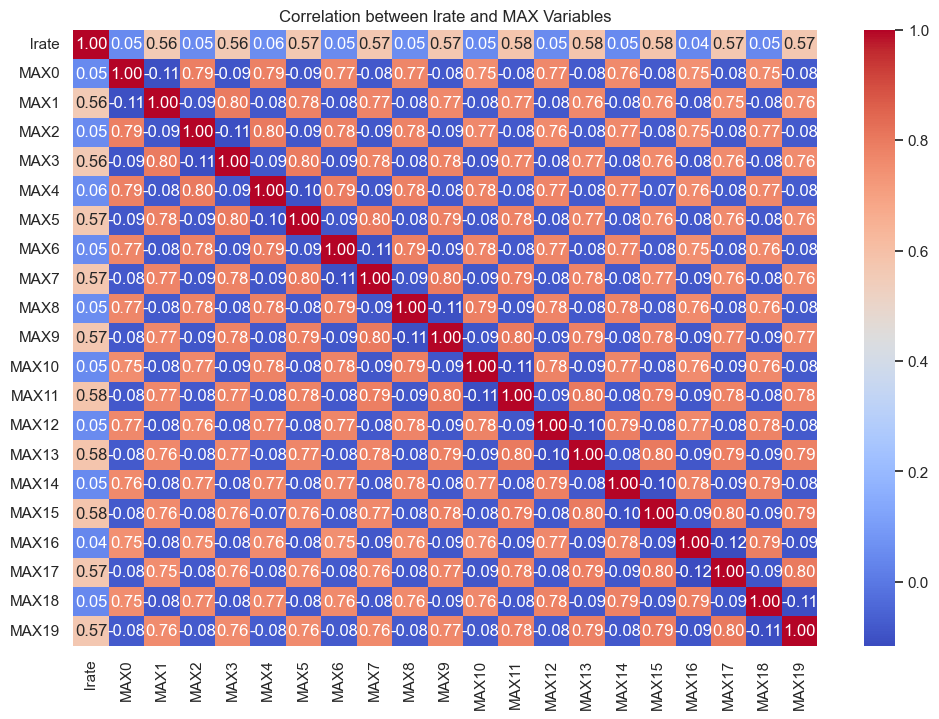

In [59]:
lm_col = ['lrate']+ list(max_col)
corr_df = df[lm_col]
corr_matrix = corr_df.corr()
# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between lrate and MAX Variables")
plt.show()

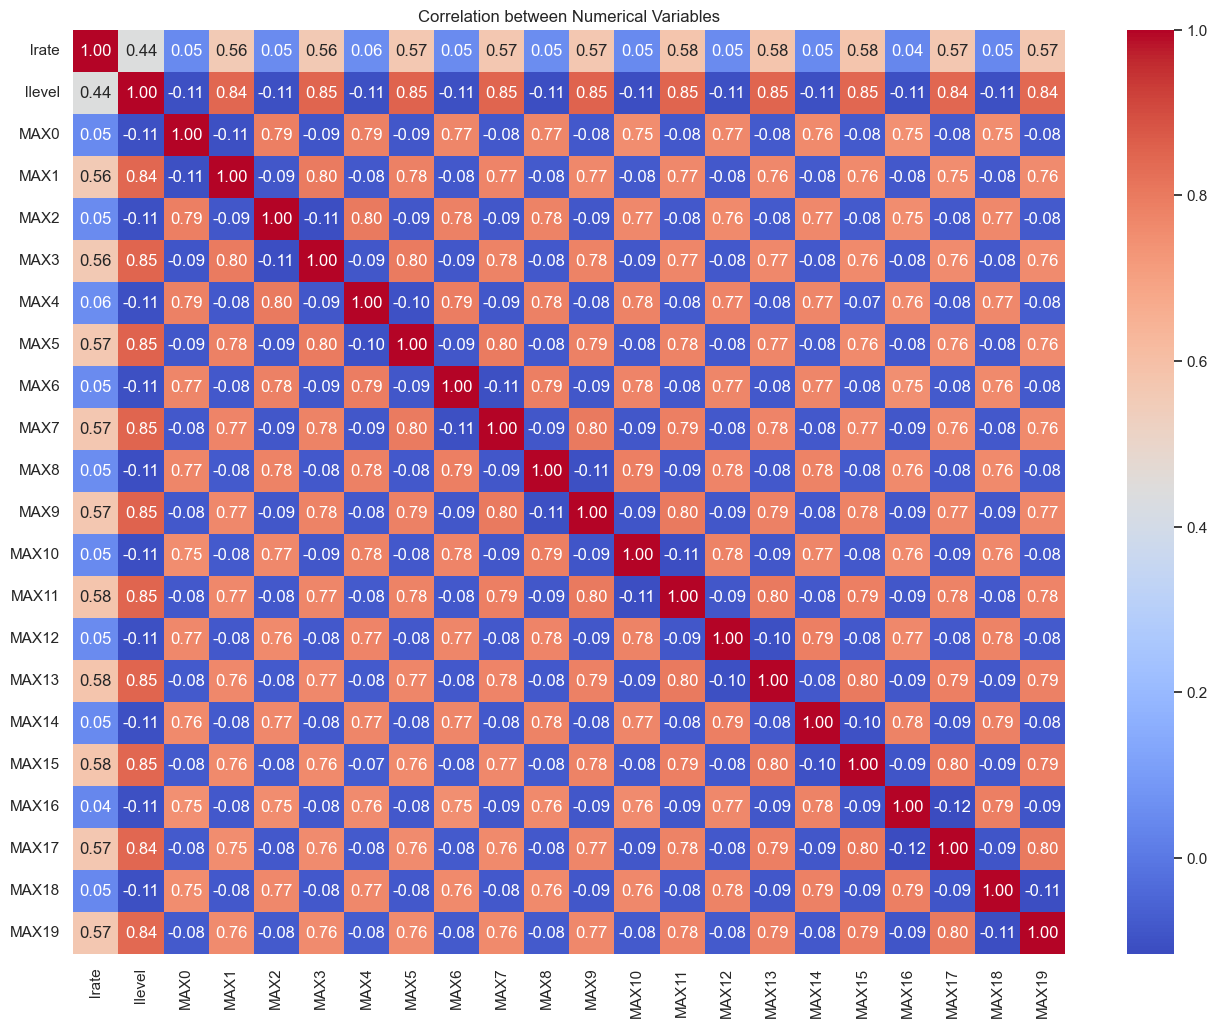

In [61]:
numerical_columns = ['lrate', 'llevel'] + list(max_col)  # 'lrate', 'llevel', 'MAX' 관련 열들 선택

corr_data = df[numerical_columns]
corr_matrix = corr_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Numerical Variables")
plt.show()


### 시간 별 누수 패턴 시각화

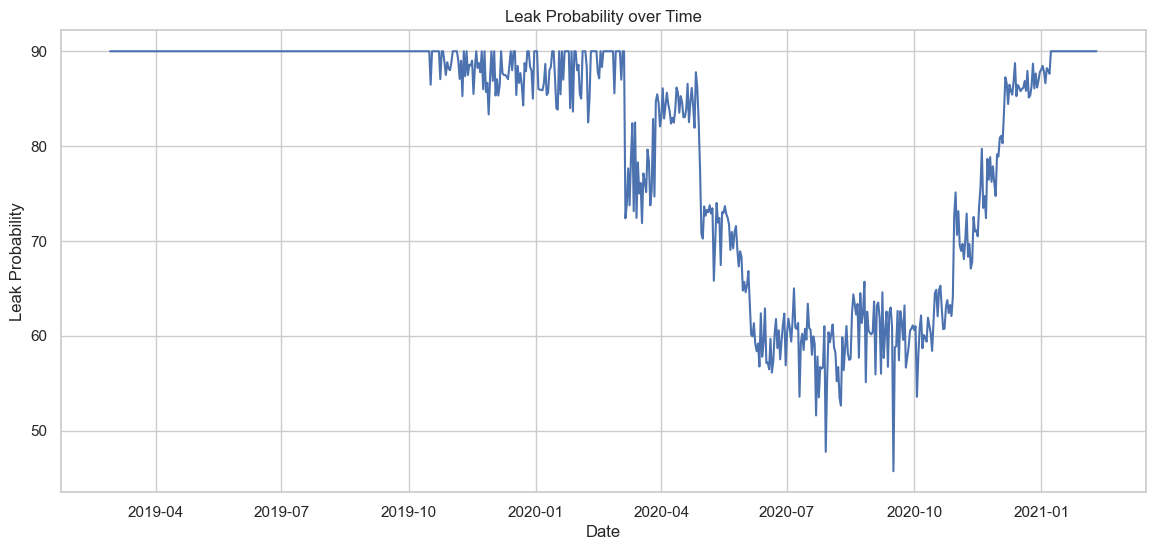

In [66]:
# 날짜별 누수 확률의 평균 
lrate_time_series = df.groupby('ldate')['lrate'].mean()
# 시간 시리즈 그래프 시각화
plt.figure(figsize=(14, 6))
plt.plot(lrate_time_series,linestyle='-', color='b')
plt.title("Leak Probability over Time")
plt.xlabel("Date")
plt.ylabel("Leak Probability")
plt.grid(True)
plt.show()

### 누수레벨 box plot

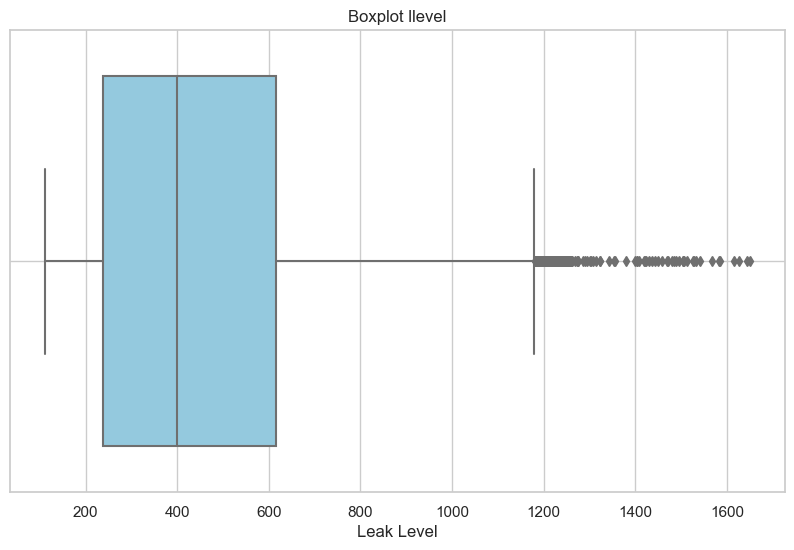

In [70]:
# 누수 레벨의 박스플롯 시각화 (이상치 탐지)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['llevel'], color='skyblue')
plt.title("Boxplot llevel")
plt.xlabel("Leak Level")
plt.grid(True)
plt.show()

In [71]:
# 이상치 분석
outliers = df[df['llevel'] >= 1200]
outliers_leaktype_counts = outliers['leaktype'].value_counts()
outliers_leaktype_counts

leaktype
noise    119
in        71
out        8
other      1
Name: count, dtype: int64

누수 레벨이 기계적 소음(noise)과 관련이 있는 경우가 많다 

In [76]:
outliers[['lrate'] + list(max_col)].mean()

lrate      90.000000
MAX0      989.648241
MAX1     1301.603015
MAX2      989.597990
MAX3     1272.477387
MAX4      989.497487
MAX5     1280.427136
MAX6      989.497487
MAX7     1275.055276
MAX8      989.447236
MAX9     1277.603015
MAX10     989.447236
MAX11    1275.929648
MAX12     976.281407
MAX13    1274.969849
MAX14     989.396985
MAX15    1277.231156
MAX16    1005.125628
MAX17    1259.040201
MAX18     997.336683
MAX19    1272.035176
dtype: float64

- 평균 누수 확률은 90으로 매우 높습니다. 이는 높은 누수 레벨(llevel >= 1200)이 발생할 때 누수 확률도 높다.

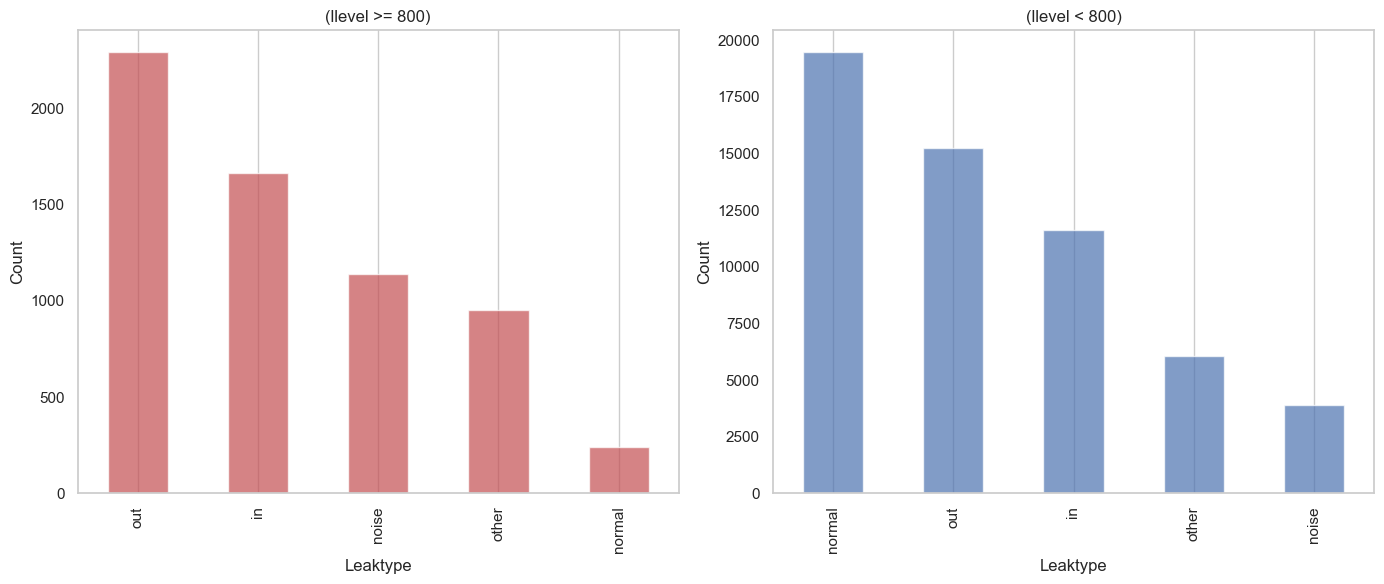

In [77]:
high_llevel_data = df[df['llevel'] >= 800]
low_llevel_data = df[df['llevel'] < 800]
plt.figure(figsize=(14, 6))

# 높은 llevel에 대한 leaktype 분포
plt.subplot(1, 2, 1)
high_llevel_data['leaktype'].value_counts().plot(kind='bar', color='r', alpha=0.7)
plt.title("(llevel >= 800)")
plt.xlabel("Leaktype")
plt.ylabel("Count")
plt.grid(axis='y')

# 낮은 llevel에 대한 leaktype 분포
plt.subplot(1, 2, 2)
low_llevel_data['leaktype'].value_counts().plot(kind='bar', color='b', alpha=0.7)
plt.title("(llevel < 800)")
plt.xlabel("Leaktype")
plt.ylabel("Count")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### 옥외누수 옥내 누수 주파수 

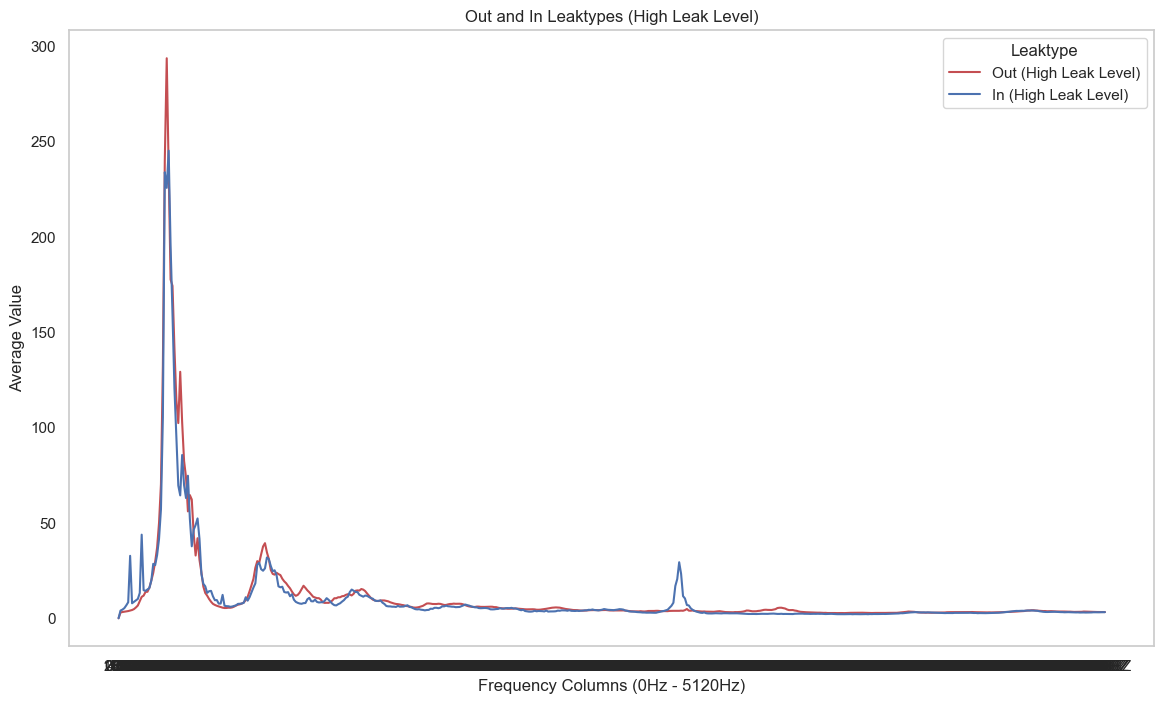

In [81]:
# llevel >= 800인 데이터 필터링 - 높은 누수 레벨 데이터만 사용 
high_llevel_data = df[df['llevel'] >= 800]

# 'out'과 'in' 유형 데이터 필터링
out_data = high_llevel_data[high_llevel_data['leaktype'] == 'out']
in_data = high_llevel_data[high_llevel_data['leaktype'] == 'in']

# 주파수 관련 열 (0Hz ~ 5120Hz) 선택
frequency_columns = df.columns[6:519]

out_mean = out_data[frequency_columns].mean()
in_mean = in_data[frequency_columns].mean()

plt.figure(figsize=(14, 8))

# 옥외(out) 누수의 평균
plt.plot(out_mean, label="Out (High Leak Level)", color='r', linestyle='-')
# 옥내(in) 누수의 평균 
plt.plot(in_mean, label="In (High Leak Level)", color='b', linestyle='-')

plt.title("Out and In Leaktypes (High Leak Level)")
plt.xlabel("Frequency Columns (0Hz - 5120Hz)")
plt.ylabel("Average Value")
plt.legend(title="Leaktype")
plt.grid()
plt.show()